# <font color='darkred'> **US O&G infrastructure inventory**
    
Major source of O&G data is [HIFLD](https://hifld-geoplatform.opendata.arcgis.com/search?collection=Dataset&groupIds=4fd22faa66a547f784bdf7779eda969f)

 - [Oil and gas wells](#Wells)
 - [Facilities]
   -  [Natural compressor stations](#Compressor_Stations)
   -  [Natural gas processing plants](#Processing_Plants)
   -  [Oil and gas terminals](#Terminals)
   -  [Crude oil refineries](#Refineries)
   -  [Oil and natural gas pipelines](#Pipelines)

 - [Oil and gas basins](#Basins)

In [1]:
# Import libraries
# ===========================================================================
import warnings
warnings.filterwarnings('ignore')

import os
# ===========================================================================
# ogimlib
from ogimlib import *


In [2]:
# Change/Set directory
os.chdir(r"C:\Users\momara\OneDrive - MethaneSAT, LLC\OGIM\Public_Data\data\North_America\United_States_\downloads_04102022")


# <font color = 'darkred'> **Oil and gas data:** *US*


In [3]:
# Should new data be downloaded?
# ===========================================================================
# ===========================================================================
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!

DATA_REFRESH = False
DATE_DOWNLOAD = "2022-04-09"

# # !!!!!!!!!!!!!!!!!!!!!!!!!!!!
# ===========================================================================
# ===========================================================================

In [4]:
# API_KEY
# ===========================================================================
# ===========================================================================
api_key = None
# ===========================================================================
# ===========================================================================

# <font color="darkblue"> **Wells** <a name="Wells"></a>
 - National well-level data comes from HIFLD, last updated 2022-12-14

In [7]:
# Read well-level data
# =================================================
fp_sh = "wells\\Oil_and_Natural_Gas_Wells.geojson"

# =================================================
print (":::: reading well-level dataset :::: ")
wells_data = read_spatial_data(fp_sh)


:::: reading well-level dataset :::: 
---------------------------------------
Total # of features in dataset = 1506238
Index(['OBJECTID', 'ID', 'NAME', 'STATE', 'TYPE', 'STATUS', 'COUNTY',
       'COUNTYFIPS', 'COUNTRY', 'LATITUDE', 'LONGITUDE', 'NAICS_CODE',
       'NAICS_DESC', 'SOURCE', 'SOURCEDATE', 'VAL_METHOD', 'VAL_DATE',
       'WEBSITE', 'WELLIDNO', 'API', 'PERMITNO', 'OPERATOR', 'OPERATORID',
       'PRODTYPE', 'COORDTYPE', 'SURF_LAT', 'SURF_LONG', 'BOT_LAT', 'BOT_LONG',
       'POSREL', 'FIELD', 'COMPDATE', 'TOTDEPTH', 'geometry'],
      dtype='object')


,OBJECTID,ID,NAME,STATE,TYPE,STATUS,COUNTY,COUNTYFIPS,COUNTRY,LATITUDE,...,COORDTYPE,SURF_LAT,SURF_LONG,BOT_LAT,BOT_LONG,POSREL,FIELD,COMPDATE,TOTDEPTH,geometry
0,1,W220000001,RRBB NAB PXY RA SU;J L SCALES,LA,OIL & NATURAL GAS WELL,NON-ACTIVE WELL,DE SOTO,22031,USA,32.06496,...,T,32.06496,-93.55748,-999.0,-999.0,THIRD PARTY,RED RIVER-BULL BAYOU,1951-04-09T00:00:00,-999.0,POINT (-93.55748 32.06496)
1,2,W220000002,P SUHH;J B BARR 28,LA,OIL & NATURAL GAS WELL,NON-ACTIVE WELL,DE SOTO,22031,USA,32.08437,...,T,32.08437,-93.90817,-999.0,-999.0,THIRD PARTY,BETHANY LONGSTREET,2004-06-19T00:00:00,-999.0,POINT (-93.90817 32.08437)
2,3,W220000003,HOSS RB SUA;POLAND,LA,OIL & NATURAL GAS WELL,NON-ACTIVE WELL,LINCOLN,22061,USA,32.65100,...,T,32.65100,-92.74102,-999.0,-999.0,THIRD PARTY,HICO-KNOWLES,2004-07-28T00:00:00,-999.0,POINT (-92.74102 32.65100)
3,4,W220000004,LODWICK LUMBER COMPANY,LA,OIL & NATURAL GAS WELL,NON-ACTIVE WELL,BOSSIER,22015,USA,32.60635,...,T,32.60635,-93.47957,-999.0,-999.0,THIRD PARTY,BELLEVUE,1949-06-09T00:00:00,-999.0,POINT (-93.47957 32.60635)
4,5,W220000005,SL 1367,LA,OIL & NATURAL GAS WELL,NON-ACTIVE WELL,LAFOURCHE,22057,USA,29.06883,...,T,29.06883,-90.17218,-999.0,-999.0,THIRD PARTY,BAY MARCHAND BLOCK 2 OFFSHORE,1950-10-05T00:00:00,-999.0,POINT (-90.17218 29.06883)


In [8]:
# Transform CRS
wells2 = transform_CRS(wells_data, appendLatLon=True)

CRS of original gdf is:  epsg:4326
CRS of new gdf is:  epsg:4326


In [9]:
# Check for US data only
us_wells = wells2.query("COUNTRY == 'USA'")
print ("Total # of wells in original dataset = {} compared with US well-level data only = {}".format(wells_data.shape[0], us_wells.shape[0]))

Total # of wells in original dataset = 1506238 compared with US well-level data only = 1490958


In [11]:
# WELL TYPE
us_wells.TYPE.unique()

# Fix well types
us_wells2 = replace_row_names(us_wells, "TYPE", dict_names={'OIL & NATURAL GAS WELL': 'OIL AND GAS', 'OIL & NATURAL GAS WELLS': 'OIL AND GAS'})

Original list of unique attributes =  ['OIL & NATURAL GAS WELL' 'OIL & NATURAL GAS WELLS']
['OIL AND GAS']


In [13]:
# Well STATUS
us_wells2.STATUS.unique()

dict_stat = {
    'NON-ACTIVE WELL':'INACTIVE', 
    'PRODUCING WELL': 'PRODUCING', 
    'PRODUCING, NON-ACTIVE WELL': 'PRODUCING BUT INACTIVE',
    'STORAGE WELL/MAINTENANCE WELL/OBSERVATION WELL': 'STORAGE/MAINTENANCE/OBSERVATION', 
    'UNKNOWN WELL': 'N/A',
    'WELL DEVELOPMENT': 'DEVELOPMENT', 
    'ACTIVE WELL': 'ACTIVE'
    }

us_wells3 = replace_row_names(us_wells2, "STATUS", dict_names=dict_stat)

Original list of unique attributes =  ['NON-ACTIVE WELL' 'PRODUCING WELL' 'PRODUCING, NON-ACTIVE WELL'
 'STORAGE WELL/MAINTENANCE WELL/OBSERVATION WELL' 'UNKNOWN WELL'
 'WELL DEVELOPMENT' 'ACTIVE WELL']
['INACTIVE' 'PRODUCING' 'PRODUCING BUT INACTIVE'
 'STORAGE/MAINTENANCE/OBSERVATION' 'N/A' 'DEVELOPMENT' 'ACTIVE']


In [22]:
# PRODUCTION TYPE
us_wells3.PRODTYPE.unique()

dict_type = {
    'UNKNOWN WELL': 'N/A', 
    'NOT AVAILABLE': 'N/A', 
    'UNKNOWN': 'N/A'
    }

us_wells4 = replace_row_names(us_wells3, "PRODTYPE", dict_names = dict_type)

# Reset index
us_wells4 = us_wells4.reset_index()

Original list of unique attributes =  ['N/A' 'GAS' 'GAS CONDENSATE' 'GAS INJECTION' 'GAS STORAGE'
 'LIQUEFIED PETROLEUM GAS' 'OIL' 'DRY GAS' 'GAS AND OIL'
 'GAS AND OIL STORAGE' 'COAL BED METHANE GAS' 'SHALE GAS' 'GAS OR OIL'
 'GAS STORAGE (RESERVOIR)' 'GAS STORAGE (CAVERN)' 'OIL INJECTION'
 'GAS STORAGE PRODUCING' 'INJECTION GAS OR OIL' 'NATURAL GAS'
 'OIL STORAGE' 'INJECTION OR GAS WELL']
['N/A' 'GAS' 'GAS CONDENSATE' 'GAS INJECTION' 'GAS STORAGE'
 'LIQUEFIED PETROLEUM GAS' 'OIL' 'DRY GAS' 'GAS AND OIL'
 'GAS AND OIL STORAGE' 'COAL BED METHANE GAS' 'SHALE GAS' 'GAS OR OIL'
 'GAS STORAGE (RESERVOIR)' 'GAS STORAGE (CAVERN)' 'OIL INJECTION'
 'GAS STORAGE PRODUCING' 'INJECTION GAS OR OIL' 'NATURAL GAS'
 'OIL STORAGE' 'INJECTION OR GAS WELL']


In [33]:
# Fix date fields
dates2_, dates4_ = [], []

for idx1_, row1_ in tqdm(us_wells4.iterrows(), total=us_wells4.shape[0]):
    # Source dates
    ddates = row1_.SOURCEDATE
    try:
        dates1_ = ddates.split("T")[0]
        if dates1_ == "1901-01-01" or dates1_ == "NOT AVAILABLE":
            dates11_ = "1900-01-01"
            dates2_.append(dates11_)
        else:
            dates2_.append(dates1_)
    except:
        dates2_.append("1900-01-01")
        
    # Comp Dates
    ddates4 = row1_.COMPDATE
    try:
        dates44 = ddates4.split("T")[0]
        if dates44 == "1901-01-01" or dates44 == "NOT AVAILABLE":
            dates44_ = "1900-01-01"
            dates4_.append(dates44_)
        else:
            dates4_.append(dates44)
    except:
        dates4_.append("1900-01-01")
        
# 
us_wells4['src_dates'] = dates2_
us_wells4['comp_dates'] = dates4_


100%|█████████████████████████████████████████████████████████████████████| 1490958/1490958 [00:48<00:00, 30707.62it/s]


In [34]:
# Check for INVALID geometries
# =================================================
sh_null_geoms, sh_list = check_invalid_geoms(us_wells4, id_attr="OBJECTID")

100%|█████████████████████████████████████████████████████████████████████| 1490958/1490958 [01:15<00:00, 19682.76it/s]

Number of features with INVALID geometries =  0


,index,OBJECTID,ID,NAME,STATE,TYPE,STATUS,COUNTY,COUNTYFIPS,COUNTRY,...,BOT_LONG,POSREL,FIELD,COMPDATE,TOTDEPTH,geometry,longitude_calc,latitude_calc,src_dates,comp_dates


In [37]:
# Check STATE_PROV
us_wells4.STATE.unique()

array(['LA', 'MD', 'MI', 'MO', 'MT', 'ND', 'NE', 'NV', 'NY', 'OR', 'PA',
       'SD', 'TN', 'UT', 'VA', 'WA', 'WV', 'AK', 'AR', 'AL', 'CA', 'CO',
       'KS', 'FL', 'KY', 'WY', 'IL', 'MS', 'OH', 'IN', 'NM', 'AZ', 'OK',
       'TX'], dtype=object)

In [60]:
# Fix abbreviated state names
dict_us_states = {
    'AL': 'ALABAMA',
    'AK': 'ALASKA',
    'AZ': 'ARIZONA',
    'AR': 'ARKANSAS',
    'CA': 'CALIFORNIA',
    'CO': 'COLORADO',
    'CT': 'CONNECTICUT',
    'DE': 'DELAWARE',
    'DC': 'DISTRICT OF COLUMBIA',
    'FL': 'FLORIDA',
    'GA': 'GEORGIA',
    'HI': 'HAWAII',
    'ID': 'IDAHO',
    'IL': 'ILLINOIS',
    'IN': 'INDIANA',
    'IA': 'IOWA',
    'KS': 'KANSAS',
    'KY': 'KENTUCKY',
    'LA': 'LOUISIANA',
    'ME': 'MAINE',
    'MD': 'MARYLAND',
    'MA': 'MASSACHUSETTS',
    'MI': 'MICHIGAN',
    'MN': 'MINNESOTA',
    'MS': 'MISSISSIPPI',
    'MO': 'MISSOURI',
    'MT': 'MONTANA',
    'NE': 'NEBRASKA',
    'NV': 'NEVADA',
    'NH': 'NEW HAMPSHIRE',
    'NJ': 'NEW JERSEY',
    'NM': 'NEW MEXICO',
    'NY': 'NEW YORK',
    'NC': 'NORTH CAROLINA',
    'ND': 'NORTH DAKOTA',
    'OH': 'OHIO',
    'OK': 'OKLAHOMA',
    'OR': 'OREGON',
    'PA': 'PENNSYLVANIA',
    'RI': 'RHODE ISLAND',
    'SC': 'SOUTH CAROLINA',
    'SD': 'NORTH DAKOTA',
    'TN': 'TENNESSEE',
    'TX': 'TEXAS',
    'UT': 'UTAH',
    'VT': 'VERMONT',
    'VA': 'VIRGINIA',
    'WA':' WASHINGTON',
    'WV': 'WEST VIRGINIA',
    'WI': 'WISCONSIN',
    'WY': 'WYOMING'
    }

us_wells5 = replace_row_names(us_wells4, "STATE", dict_names=dict_us_states)


Original list of unique attributes =  ['LA' 'MD' 'MI' 'MO' 'MT' 'ND' 'NE' 'NV' 'NY' 'OR' 'PA' 'SD' 'TN' 'UT'
 'VA' 'WA' 'WV' 'AK' 'AR' 'AL' 'CA' 'CO' 'KS' 'FL' 'KY' 'WY' 'IL' 'MS'
 'OH' 'IN' 'NM' 'AZ' 'OK' 'TX']
['LOUISIANA' 'MARYLAND' 'MICHIGAN' 'MISSOURI' 'MONTANA' 'NORTH DAKOTA'
 'NEBRASKA' 'NEVADA' 'NEW YORK' 'OREGON' 'PENNSYLVANIA' 'TENNESSEE' 'UTAH'
 'VIRGINIA' ' WASHINGTON' 'WEST VIRGINIA' 'ALASKA' 'ARKANSAS' 'ALABAMA'
 'CALIFORNIA' 'COLORADO' 'KANSAS' 'FLORIDA' 'KENTUCKY' 'WYOMING'
 'ILLINOIS' 'MISSISSIPPI' 'OHIO' 'INDIANA' 'NEW MEXICO' 'ARIZONA'
 'OKLAHOMA' 'TEXAS']


In [63]:
# Read state and federal offshore boundaries data
# Data comes from https://marinecadastre.gov/data/ (federal and state waters dataset)

offshore_polys = read_spatial_data("offshore_leases\\FederalAndStateWaters.gdb")

---------------------------------------
Total # of features in dataset = 40
Index(['Jurisdicti', 'area_mi2', 'area_km2', 'area_nm2', 'Shape_Length',
       'Shape_Area', 'geometry'],
      dtype='object')


,Jurisdicti,area_mi2,area_km2,area_nm2,Shape_Length,Shape_Area,geometry
0,Puerto Rico,5425.955791,14053.160985,4097.267053,1.784409e+06,1.405316e+10,"MULTIPOLYGON (((-7537467.949 2043503.287, -753..."
1,U.S. Virgin Islands,669.552517,1734.133059,505.594881,6.083448e+05,1.734133e+09,"MULTIPOLYGON (((-7194828.361 2006341.668, -719..."
2,Guam,334.573634,866.541734,252.644434,3.234532e+05,8.665417e+08,"MULTIPOLYGON (((16133674.540 1525177.449, 1613..."
3,Baker Island,49.309288,127.710470,37.234605,4.499992e+04,1.277105e+08,"MULTIPOLYGON (((-19645752.622 27955.649, -1964..."
4,Howland Island,52.780361,136.700507,39.855694,4.844176e+04,1.367005e+08,"MULTIPOLYGON (((-19660835.982 82262.547, -1966..."


In [64]:
# Transform CRS
offshore_polys2 = transform_CRS(offshore_polys)

CRS of original gdf is:  epsg:3395
CRS of new gdf is:  epsg:4326


In [79]:
# Onshore versus offshore
def assign_offshore_label_to_us_data(
    gdf: 'GeoDataFrame',
    offshore_boundary: 'GeoDataFrame'
    ):
    
    """Append onshore/offshore attribute to gdf based on whether record falls within or outside of `offshore_boundary`"""
    
    # Check CRS
    if gdf.crs != offshore_boundary.crs:
        print("CRS don't match! \n Results may not be accurate!")
    
    # Check that index is unique
    if gdf.index.is_unique == False:
        print("GeoDataFrame indices are not unique! \n Results may not be accurate!")
    
    # Points within boundary
    points_within_ = gpd.sjoin(gdf, offshore_boundary, op='within')
    points_within_['on_offshore'] = 'OFFSHORE'
    
    # Points outside of boundary
    points_outside_ = gdf[~gdf.index.isin(points_within_.index)]
    points_outside_['on_offshore'] = 'ONSHORE'
    
    # Merge the two datasets
    gdf2 = pd.concat([points_within_, points_outside_]).sort_index()
    
    # Display results
    display(gdf2.head())
    
    return gdf2

In [80]:
# Assign offshore, onshore label to data
us_wells6 = assign_offshore_label_to_us_data(us_wells5, offshore_polys2)

,index,OBJECTID,ID,NAME,STATE,TYPE,STATUS,COUNTY,COUNTYFIPS,COUNTRY,...,src_dates,comp_dates,index_right,Jurisdicti,area_mi2,area_km2,area_nm2,Shape_Length,Shape_Area,on_offshore
0,0,1,W220000001,RRBB NAB PXY RA SU;J L SCALES,LOUISIANA,OIL AND GAS,INACTIVE,DE SOTO,22031,USA,...,2014-01-01,1951-04-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ONSHORE
1,1,2,W220000002,P SUHH;J B BARR 28,LOUISIANA,OIL AND GAS,INACTIVE,DE SOTO,22031,USA,...,2014-01-01,2004-06-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ONSHORE
2,2,3,W220000003,HOSS RB SUA;POLAND,LOUISIANA,OIL AND GAS,INACTIVE,LINCOLN,22061,USA,...,2014-01-01,2004-07-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ONSHORE
3,3,4,W220000004,LODWICK LUMBER COMPANY,LOUISIANA,OIL AND GAS,INACTIVE,BOSSIER,22015,USA,...,2014-01-01,1949-06-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ONSHORE
4,4,5,W220000005,SL 1367,LOUISIANA,OIL AND GAS,INACTIVE,LAFOURCHE,22057,USA,...,2014-01-01,1950-10-05,14.0,Louisiana,10163.553671,26323.483165,7674.738831,5.242956e+07,2.632348e+10,OFFSHORE


In [83]:
# Replace NAME
us_wells7 = replace_row_names(us_wells6, "NAME", dict_names={'NOT AVAILABLE':'N/A'})

Original list of unique attributes =  ['RRBB NAB PXY RA SU;J L SCALES' 'P SUHH;J B BARR 28' 'HOSS RB SUA;POLAND'
 ... 'JOHN O. HALL' 'TEMPLE-EASTEX "309"' 'TEMPLE-EASTEX "381"']
['RRBB NAB PXY RA SU;J L SCALES' 'P SUHH;J B BARR 28' 'HOSS RB SUA;POLAND'
 ... 'JOHN O. HALL' 'TEMPLE-EASTEX "309"' 'TEMPLE-EASTEX "381"']


In [98]:
# Integrate well-level data
# ===========================================================================
us_wells, us_wells_errors = integrate_facs(
    us_wells7,
    starting_ids=1,
    category="Oil and natural gas wells",
    fac_alias="WELLS",
    country="United States",
    state_prov="STATE",
    src_ref_id="80, 82",
    src_date="src_dates",
    on_offshore="on_offshore",
    fac_name=None,
    fac_id="API",
    fac_type="PRODTYPE",
    spud_date=None,
    comp_date="comp_dates",
    drill_type=None,
    install_date=None,
    fac_status="STATUS",
    op_name="NAME",
    commodity=None,
    liq_capacity_bpd=None,
    liq_throughput_bpd=None,
    gas_capacity_mmcfd=None,
    gas_throughput_mmcfd=None,
    num_compr_units=None,
    num_storage_tanks=None,
    site_hp=None,
    fac_latitude="latitude_calc",
    fac_longitude="longitude_calc"
    )

100%|██████████████████████████████████████████████████████████████████████| 1490958/1490958 [15:05<00:00, 1646.44it/s]


,OGIM_ID,CATEGORY,COUNTRY,STATE_PROV,SRC_REF_ID,SRC_DATE,ON_OFFSHORE,FAC_NAME,FAC_ID,FAC_TYPE,FAC_STATUS,OPERATOR,SPUD_DATE,COMP_DATE,DRILL_TYPE,LATITUDE,LONGITUDE,geometry
0,2180265.0,OIL AND NATURAL GAS WELLS,UNITED STATES,LOUISIANA,"80, 82",2014-01-01,ONSHORE,N/A,17031013810000,N/A,INACTIVE,RRBB NAB PXY RA SU;J L SCALES,1900-01-01,1951-04-09,N/A,32.06496,-93.55748,POINT (-93.55748 32.06496)
1,2180266.0,OIL AND NATURAL GAS WELLS,UNITED STATES,LOUISIANA,"80, 82",2014-01-01,ONSHORE,N/A,17031236520000,N/A,INACTIVE,P SUHH;J B BARR 28,1900-01-01,2004-06-19,N/A,32.08437,-93.90817,POINT (-93.90817 32.08437)
2,2180267.0,OIL AND NATURAL GAS WELLS,UNITED STATES,LOUISIANA,"80, 82",2014-01-01,ONSHORE,N/A,17061207740000,N/A,INACTIVE,HOSS RB SUA;POLAND,1900-01-01,2004-07-28,N/A,32.651,-92.74102,POINT (-92.74102 32.65100)
3,2180268.0,OIL AND NATURAL GAS WELLS,UNITED STATES,LOUISIANA,"80, 82",2014-01-01,ONSHORE,N/A,17015012220000,N/A,INACTIVE,LODWICK LUMBER COMPANY,1900-01-01,1949-06-09,N/A,32.60635,-93.47957,POINT (-93.47957 32.60635)
4,2180269.0,OIL AND NATURAL GAS WELLS,UNITED STATES,LOUISIANA,"80, 82",2014-01-01,OFFSHORE,N/A,17714000570000,N/A,INACTIVE,SL 1367,1900-01-01,1950-10-05,N/A,29.06883,-90.17218,POINT (-90.17218 29.06883)


In [100]:
# Save data
# ===========================================================================
save_spatial_data(
    us_wells, 
    "united_states_oil_gas_wells", 
    schema_def=True, 
    schema=schema_WELLS, 
    file_type="GeoJSON", 
    out_path="results\\")


===Successfully saved GeoJSON to specified path===


# Offshore platforms <a name="Platforms"></a>


In [101]:
# Read data
# ===========================================================================
platforms = read_spatial_data("oil_gas_platforms\\Oil_and_Natural_Gas_Platforms.geojson")


---------------------------------------
Total # of features in dataset = 7294
Index(['OBJECTID', 'PLATFRMID', 'NAME', 'TYPE', 'STATUS', 'LATITUDE',
       'LONGITUDE', 'NAICS_CODE', 'NAICS_DESC', 'SOURCE', 'SOURCEDATE',
       'VAL_METHOD', 'VAL_DATE', 'COMPLEXID', 'NOSTR', 'OWNER', 'OPERNAME',
       'POSREL', 'COMMODITY', 'INSTALL', 'REMOVAL', 'MANNED24HR', 'DISTLAND',
       'WATERDEPTH', 'RIGCOUNT', 'PWRSOURCE', 'PWRGENFLAG', 'OILPRDFLAG',
       'GASMTRFLAG', 'COMPREFLAG', 'COMPRDFLAG', 'HELPRTFLAG', 'BEDCOUNT',
       'BLOCKNO', 'LEASENO', 'AREANUMBER', 'REGION', 'GlobalID', 'geometry'],
      dtype='object')


,OBJECTID,PLATFRMID,NAME,TYPE,STATUS,LATITUDE,LONGITUDE,NAICS_CODE,NAICS_DESC,SOURCE,...,COMPREFLAG,COMPRDFLAG,HELPRTFLAG,BEDCOUNT,BLOCKNO,LEASENO,AREANUMBER,REGION,GlobalID,geometry
0,1,GOM00001,1,OFFSHORE PLATFORM,REMOVED,29.475145,-93.813003,211111,CRUDE PETROLEUM AND NATURAL GAS EXTRACTION,BOEM/BSEE,...,N,U,Y,-999,38,G14878,HI,GULF OF MEXICO,{01C92D58-F3C0-407B-B9A4-D142C8745222},POINT (-93.81300 29.47514)
1,2,GOM00002,C,OFFSHORE PLATFORM,REMOVED,29.175393,-94.371967,211111,CRUDE PETROLEUM AND NATURAL GAS EXTRACTION,BOEM/BSEE,...,N,U,Y,-999,176,G06164,HI,GULF OF MEXICO,{4B90D543-D5FC-4DB2-B3E6-FFCDA05D33B0},POINT (-94.37197 29.17539)
2,3,GOM00003,1,OFFSHORE PLATFORM,REMOVED,28.954166,-93.014757,211111,CRUDE PETROLEUM AND NATURAL GAS EXTRACTION,BOEM/BSEE,...,N,U,Y,-999,263,G15072,WC,GULF OF MEXICO,{0D32D0E6-959B-4D22-BF22-1FEEC4F276A5},POINT (-93.01476 28.95417)
3,4,GOM00004,9,OFFSHORE PLATFORM,REMOVED,29.068306,-89.795080,211111,CRUDE PETROLEUM AND NATURAL GAS EXTRACTION,BOEM/BSEE,...,N,U,N,-999,40,G01072,WD,GULF OF MEXICO,{5F615A27-50AF-42B7-9F8E-80B1E70FBE92},POINT (-89.79508 29.06831)
4,5,GOM00005,CAIS.#21(PLF.CF,OFFSHORE PLATFORM,IN SERVICE,28.898903,-90.504417,211111,CRUDE PETROLEUM AND NATURAL GAS EXTRACTION,BOEM/BSEE,...,N,N,N,-999,51,G01240,ST,GULF OF MEXICO,{F67833B0-E13D-4AF4-B2D5-7A29D4E0764D},POINT (-90.50442 28.89890)


In [102]:
# Check CRS
platforms2 = transform_CRS(platforms, appendLatLon=True)

CRS of original gdf is:  epsg:4326
CRS of new gdf is:  epsg:4326


In [104]:
# Source dates, Installation dates
platforms2.INSTALL.unique()

array(['1998-01-05T00:00:00', '1997-02-28T00:00:00',
       '1997-08-26T00:00:00', ..., '1985-10-05T00:00:00',
       '1985-08-07T00:00:00', '1986-07-02T00:00:00'], dtype=object)

In [107]:
# Standardize date fields
def standardize_dates_hifld_us(
    gdf: 'GeoDataFrame',
    attrName: 'str',
    newAttrName: 'str'
    ):
    
    """Fix date formats for HIFLD datasets for US
    
    Inputs:
    ---
        gdf: GeoDataFrame
        attrName: attribute name for date field to be standardized
        newAttrName: new attribute name for standardized dates
        
    Returns:
    ---
        gdf: new dataframe with standardized date field in "newAttrName" field
    
    """
    dates2_ = []

    for idx1_, row1_ in tqdm(gdf.iterrows(), total=gdf.shape[0]):
        # Date
        ddates = row1_[attrName]
        try:
            dates1_ = ddates.split("T")[0]
            if dates1_ == "1901-01-01" or dates1_ == "NOT AVAILABLE":
                dates11_ = "1900-01-01"
                dates2_.append(dates11_)
            else:
                dates2_.append(dates1_)
        except:
            dates2_.append("1900-01-01")
            
    # Append results to a new column
    gdf[newAttrName] = dates2_
    
    return gdf


In [108]:
# Standardize install dates and source dates
gdf3_plats = standardize_dates_hifld_us(platforms2, attrName="SOURCEDATE", newAttrName="src_dates")
gdf4_plats = standardize_dates_hifld_us(gdf3_plats, attrName="INSTALL", newAttrName="install_dates")

100%|███████████████████████████████████████████████████████████████████████████| 7294/7294 [00:00<00:00, 39035.05it/s]


In [110]:
# Standardize commodity
gdf4_plats.COMMODITY.unique()

gdf5_plats = replace_row_names(gdf4_plats, "COMMODITY", dict_names={'NONE':'N/A', 'UNKNOWN': 'N/A', 'BOTH': 'OIL AND GAS', 'NATURAL GAS':'GAS'})

Original list of unique attributes =  ['NONE' 'BOTH' 'UNKNOWN' 'NATURAL GAS' 'OIL']
['N/A' 'OIL AND GAS' 'GAS' 'OIL']


In [117]:
gdf5_plats.STATUS.unique()

# Standardize STATUS
gdf6_plats = replace_row_names(gdf5_plats, "STATUS", dict_names={"NOT AVAILABLE": "N/A"})

Original list of unique attributes =  ['REMOVED' 'IN SERVICE' 'NOT AVAILABLE']
['REMOVED' 'IN SERVICE' 'N/A']


In [122]:
# Integrate platforms DATA
# ===========================================================================

plats_us, plats_errors_ab = integrate_facs(
    gdf6_plats,
    starting_ids=us_wells.OGIM_ID.iloc[-1]+1,
    category="Offshore platforms",
    fac_alias="OTHER",
    country="United States",
    state_prov="REGION",
    src_ref_id="86",
    src_date="src_dates",
    on_offshore="Offshore",
    fac_name="NAME",
    fac_id="PLATFRMID",
    fac_type="TYPE",
    spud_date=None,
    comp_date=None,
    drill_type=None,
    install_date="install_dates",
    fac_status="STATUS",
    op_name="OPERNAME",
    commodity="COMMODITY",
    liq_capacity_bpd=None,
    liq_throughput_bpd=None,
    gas_capacity_mmcfd=None,
    gas_throughput_mmcfd=None,
    num_compr_units=None,
    num_storage_tanks=None,
    site_hp=None,
    fac_latitude="latitude_calc",
    fac_longitude="longitude_calc"
    )

100%|████████████████████████████████████████████████████████████████████████████| 7294/7294 [00:04<00:00, 1681.54it/s]


,OGIM_ID,CATEGORY,COUNTRY,STATE_PROV,SRC_REF_ID,SRC_DATE,ON_OFFSHORE,FAC_NAME,FAC_ID,FAC_TYPE,FAC_STATUS,OPERATOR,INSTALL_DATE,COMMODITY,LATITUDE,LONGITUDE,geometry
0,3671223.0,OFFSHORE PLATFORMS,UNITED STATES,GULF OF MEXICO,86,2016-05-03,OFFSHORE,1,GOM00001,OFFSHORE PLATFORM,REMOVED,"MERIT ENERGY CO., LLC",1998-01-05,N/A,29.47514,-93.813,POINT (-93.81300 29.47514)
1,3671224.0,OFFSHORE PLATFORMS,UNITED STATES,GULF OF MEXICO,86,2016-05-03,OFFSHORE,C,GOM00002,OFFSHORE PLATFORM,REMOVED,APACHE CORP.,1997-02-28,N/A,29.17539,-94.37197,POINT (-94.37197 29.17539)
2,3671225.0,OFFSHORE PLATFORMS,UNITED STATES,GULF OF MEXICO,86,2016-05-03,OFFSHORE,1,GOM00003,OFFSHORE PLATFORM,REMOVED,"CAIRN ENERGY USA, INC.",1997-08-26,N/A,28.95417,-93.01476,POINT (-93.01476 28.95417)
3,3671226.0,OFFSHORE PLATFORMS,UNITED STATES,GULF OF MEXICO,86,2016-05-03,OFFSHORE,9,GOM00004,OFFSHORE PLATFORM,REMOVED,APACHE CORP.,1997-07-22,N/A,29.06831,-89.79508,POINT (-89.79508 29.06831)
4,3671227.0,OFFSHORE PLATFORMS,UNITED STATES,GULF OF MEXICO,86,2016-05-03,OFFSHORE,CAIS.#21(PLF.CF,GOM00005,OFFSHORE PLATFORM,IN SERVICE,CHEVRON USA INC.,1997-06-19,OIL AND GAS,28.8989,-90.50442,POINT (-90.50442 28.89890)


In [123]:
# Save data
# ===========================================================================
save_spatial_data(
    plats_us, 
    "united_states_offshore_oil_gas_platforms", 
    schema_def=True, 
    schema=schema_OTHER, 
    file_type="GeoJSON", 
    out_path="results\\")


===Successfully saved GeoJSON to specified path===


# Natural gas compressor stations <a name="Compressor_Stations"></a>
 - Data comes from HIFLD for inter/intra-state compressor station data
 - We also have some additional datasets from Marchese et al.
 - We also have some additional datasets from EPA

In [124]:
# HIFLD data
# ===========================================================================
comp_statns1 = read_spatial_data("compressor_stations\\Natural_Gas_Compressor_Stations.geojson")

---------------------------------------
Total # of features in dataset = 1768
Index(['OBJECTID', 'GCOMPID', 'NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP',
       'ZIP4', 'TYPE', 'STATUS', 'COUNTY', 'COUNTYFIPS', 'COUNTRY', 'LATITUDE',
       'LONGITUDE', 'NAICS_CODE', 'NAICS_DESC', 'SOURCE', 'SOURCEDATE',
       'VAL_METHOD', 'VAL_DATE', 'WEBSITE', 'PIPECO', 'COMPID', 'OPERATOR',
       'POSREL', 'NUM_UNITS', 'CERT_HP', 'PLANT_COST', 'EXP_FUEL', 'EXP_OTHER',
       'GAS_COMPRE', 'OP_COMP_HR', 'OP_NUM_COM', 'OP_DATE_PE', 'EXP_POWER',
       'ELEC_COMPR', 'geometry'],
      dtype='object')


,OBJECTID,GCOMPID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,TYPE,STATUS,...,PLANT_COST,EXP_FUEL,EXP_OTHER,GAS_COMPRE,OP_COMP_HR,OP_NUM_COM,OP_DATE_PE,EXP_POWER,ELEC_COMPR,geometry
0,1,GCOMP1,HELVETIA,.25 MILES EAST OF DELARME RD & KRINER LN,LUTHERSBURG,PA,15848,NOT AVAILABLE,NATURAL GAS COMPRESSOR STATION,IN SERVICE,...,372782.0,17864.0,62170.0,7240.0,3426.0,1.0,2012-06-01T00:00:00,0.0,0.0,POINT (-78.77245 41.05712)
1,2,GCOMP10,NO. 515 BEAR CREEK,0.2 MILES SOUTHEAST OF HWY 115 & BLUEBERRY LANE,BEAR CREEK,PA,18602,NOT AVAILABLE,NATURAL GAS COMPRESSOR STATION,IN SERVICE,...,30777444.0,1283985.0,2013445.0,426144.0,8119.0,6.0,2012-11-07T00:00:00,0.0,0.0,POINT (-75.67218 41.17248)
2,3,GCOMP100,NO. 130 COMER,117 WINNS LAKE RD.,COMER,GA,30629,NOT AVAILABLE,NATURAL GAS COMPRESSOR STATION,IN SERVICE,...,46543043.0,7468983.0,4192360.0,2825079.0,96736.0,18.0,2013-01-26T00:00:00,11834.0,-999.0,POINT (-83.14268 34.15155)
3,4,GCOMP1000,583 OTIS,COUNTY ROAD 390; S11-T17S-R16W,OTIS,KS,67565,NOT AVAILABLE,NATURAL GAS COMPRESSOR STATION,IN SERVICE,...,3933939.0,380293.0,153920.0,146889.0,8510.0,1.0,2012-06-03T00:00:00,0.0,0.0,POINT (-99.05227 38.58436)
4,5,GCOMP1001,COLORADO - SKULL CREEK DEW POINT PLANT,COUNTY ROAD 4; SW SE SEC 32 T12N R97W,MAYBELL,CO,81640,NOT AVAILABLE,NATURAL GAS COMPRESSOR STATION,IN SERVICE,...,950473.0,84436.0,375595.0,32497.0,7002.0,1.0,2012-12-23T00:00:00,0.0,0.0,POINT (-108.31193 40.95056)


In [125]:
# Transform CRS
# ===========================================================================
comps2 = transform_CRS(comp_statns1, appendLatLon=True)

CRS of original gdf is:  epsg:4326
CRS of new gdf is:  epsg:4326


In [128]:
# Source dates and install dates
# ===========================================================================
comps3 = standardize_dates_hifld_us(comps2, attrName="SOURCEDATE", newAttrName="src_dates")
comps4 = standardize_dates_hifld_us(comps3, attrName="OP_DATE_PE", newAttrName="install_dates")

100%|███████████████████████████████████████████████████████████████████████████| 1768/1768 [00:00<00:00, 38503.03it/s]


In [133]:
# Standardize STATUS
# ===========================================================================
comps5 = replace_row_names(comps4, colName="STATUS", dict_names={'NOT AVAILABLE': 'N/A'})

Original list of unique attributes =  ['IN SERVICE' 'CLOSED' 'NOT AVAILABLE']
['IN SERVICE' 'CLOSED' 'N/A']


In [138]:
# Use only US data
# ===========================================================================
comps6 = comps5.query("COUNTRY == 'USA'").reset_index()


In [145]:
# Standardize state names
# ===========================================================================
comps7 = replace_row_names(comps6, "STATE", dict_names=dict_us_states)

Original list of unique attributes =  ['PA' 'GA' 'KS' 'CO' 'WY' 'MO' 'TX' 'NE' 'AZ' 'UT' 'AR' 'LA' 'IA' 'WV'
 'OK' 'ID' 'WI' 'WA' 'MT' 'FL' 'NY' 'OR' 'IN' 'MD' 'KY' 'MI' 'ND' 'AL'
 'NM' 'TN' 'IL' 'MS' 'OH' 'ME' 'NJ' 'SD' 'SC' 'NOT APPLICABLE' 'MN' 'VA'
 'NV' 'RI' 'MA' 'NC' 'CT' 'CA' 'NH']
['PENNSYLVANIA' 'GEORGIA' 'KANSAS' 'COLORADO' 'WYOMING' 'MISSOURI' 'TEXAS'
 'NEBRASKA' 'ARIZONA' 'UTAH' 'ARKANSAS' 'LOUISIANA' 'IOWA' 'WEST VIRGINIA'
 'OKLAHOMA' 'IDAHO' 'WISCONSIN' ' WASHINGTON' 'MONTANA' 'FLORIDA'
 'NEW YORK' 'OREGON' 'INDIANA' 'MARYLAND' 'KENTUCKY' 'MICHIGAN'
 'NORTH DAKOTA' 'ALABAMA' 'NEW MEXICO' 'TENNESSEE' 'ILLINOIS'
 'MISSISSIPPI' 'OHIO' 'MAINE' 'NEW JERSEY' 'SOUTH CAROLINA'
 'NOT APPLICABLE' 'MINNESOTA' 'VIRGINIA' 'NEVADA' 'RHODE ISLAND'
 'MASSACHUSETTS' 'NORTH CAROLINA' 'CONNECTICUT' 'CALIFORNIA'
 'NEW HAMPSHIRE']


In [157]:
# Assign offshore label names
comps8 = assign_offshore_label_to_us_data(
    comps7,
    offshore_boundary=offshore_polys2
    )

,index,OBJECTID,GCOMPID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,TYPE,...,src_dates,install_dates,index_right,Jurisdicti,area_mi2,area_km2,area_nm2,Shape_Length,Shape_Area,on_offshore
0,0,1,GCOMP1,HELVETIA,.25 MILES EAST OF DELARME RD & KRINER LN,LUTHERSBURG,PENNSYLVANIA,15848,NOT AVAILABLE,NATURAL GAS COMPRESSOR STATION,...,2015-09-24,2012-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ONSHORE
1,1,2,GCOMP10,NO. 515 BEAR CREEK,0.2 MILES SOUTHEAST OF HWY 115 & BLUEBERRY LANE,BEAR CREEK,PENNSYLVANIA,18602,NOT AVAILABLE,NATURAL GAS COMPRESSOR STATION,...,2015-08-25,2012-11-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ONSHORE
2,2,3,GCOMP100,NO. 130 COMER,117 WINNS LAKE RD.,COMER,GEORGIA,30629,NOT AVAILABLE,NATURAL GAS COMPRESSOR STATION,...,2015-08-25,2013-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ONSHORE
3,3,4,GCOMP1000,583 OTIS,COUNTY ROAD 390; S11-T17S-R16W,OTIS,KANSAS,67565,NOT AVAILABLE,NATURAL GAS COMPRESSOR STATION,...,2015-09-09,2012-06-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ONSHORE
4,4,5,GCOMP1001,COLORADO - SKULL CREEK DEW POINT PLANT,COUNTY ROAD 4; SW SE SEC 32 T12N R97W,MAYBELL,COLORADO,81640,NOT AVAILABLE,NATURAL GAS COMPRESSOR STATION,...,2015-09-11,2012-12-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ONSHORE


In [178]:
comps8['mmcfd_thru'] = comps8['GAS_COMPRE']/1000

In [181]:
# Integrate compressor station data
# ===========================================================================
comps_us, comps_errors_ab = integrate_facs(
    comps8,
    starting_ids=plats_us.OGIM_ID.iloc[-1]+1,
    category="Natural gas compressor stations",
    fac_alias="COMPR_PROC",
    country="United States",
    state_prov="STATE",
    src_ref_id="87",
    src_date="2022-04-15",
    on_offshore="on_offshore",
    fac_name="NAME",
    fac_id="GCOMPID",
    fac_type="TYPE",
    spud_date=None,
    comp_date=None,
    drill_type=None,
    install_date="install_dates",
    fac_status="STATUS",
    op_name="OPERATOR",
    commodity=None,
    liq_capacity_bpd=None,
    liq_throughput_bpd=None,
    gas_capacity_mmcfd=None,
    gas_throughput_mmcfd="mmcfd_thru",
    num_compr_units='NUM_UNITS',
    num_storage_tanks=None,
    site_hp="CERT_HP",
    fac_latitude="latitude_calc",
    fac_longitude="longitude_calc"
    )

100%|████████████████████████████████████████████████████████████████████████████| 1390/1390 [00:00<00:00, 1638.23it/s]


*** There are possible errors in assigned attribute names! 
 Please check error_logs *** 
 [None] for attributes ['NUM_STORAGE_TANKS']


,OGIM_ID,CATEGORY,COUNTRY,STATE_PROV,SRC_REF_ID,SRC_DATE,ON_OFFSHORE,FAC_NAME,FAC_ID,FAC_TYPE,...,LIQ_CAPACITY_BPD,LIQ_THROUGHPUT_BPD,GAS_CAPACITY_MMCFD,GAS_THROUGHPUT_MMCFD,NUM_COMPR_UNITS,NUM_STORAGE_TANKS,SITE_HP,LATITUDE,LONGITUDE,geometry
0,3678517.0,NATURAL GAS COMPRESSOR STATIONS,UNITED STATES,PENNSYLVANIA,87,2022-04-15,ONSHORE,HELVETIA,GCOMP1,NATURAL GAS COMPRESSOR STATION,...,-999,-999,-999,7.24,1.0,-999,330.0,41.05712,-78.77245,POINT (-78.77245 41.05712)
1,3678518.0,NATURAL GAS COMPRESSOR STATIONS,UNITED STATES,PENNSYLVANIA,87,2022-04-15,ONSHORE,NO. 515 BEAR CREEK,GCOMP10,NATURAL GAS COMPRESSOR STATION,...,-999,-999,-999,426.0,6.0,-999,32000.0,41.17248,-75.67218,POINT (-75.67218 41.17248)
2,3678519.0,NATURAL GAS COMPRESSOR STATIONS,UNITED STATES,GEORGIA,87,2022-04-15,ONSHORE,NO. 130 COMER,GCOMP100,NATURAL GAS COMPRESSOR STATION,...,-999,-999,-999,2830.0,18.0,-999,59290.0,34.15155,-83.14268,POINT (-83.14268 34.15155)
3,3678520.0,NATURAL GAS COMPRESSOR STATIONS,UNITED STATES,KANSAS,87,2022-04-15,ONSHORE,583 OTIS,GCOMP1000,NATURAL GAS COMPRESSOR STATION,...,-999,-999,-999,147.0,1.0,-999,2400.0,38.58436,-99.05227,POINT (-99.05227 38.58436)
4,3678521.0,NATURAL GAS COMPRESSOR STATIONS,UNITED STATES,COLORADO,87,2022-04-15,ONSHORE,COLORADO - SKULL CREEK DEW POINT PLANT,GCOMP1001,NATURAL GAS COMPRESSOR STATION,...,-999,-999,-999,32.5,1.0,-999,100.0,40.95056,-108.31193,POINT (-108.31193 40.95056)


### Next, look at EPA data for compressor stations
 - Data from EPA FLIGHT, GHGRP reporting

In [154]:
# Transmission compressor stations
# ===========================================================================
comp_epa = pd.read_excel("epa_flight_data\\transmission_compression_stations.xls", header=5)

# Create geodataframe
comp_epa_gdf = gpd.GeoDataFrame(comp_epa, geometry=gpd.points_from_xy(comp_epa.LONGITUDE, comp_epa.LATITUDE), crs="epsg:4326")
comp_epa_gdf.head()

,REPORTING YEAR,FACILITY NAME,GHGRP ID,REPORTED ADDRESS,LATITUDE,LONGITUDE,CITY NAME,COUNTY NAME,STATE,ZIP CODE,PARENT COMPANIES,GHG QUANTITY (METRIC TONS CO2e),SUBPARTS,geometry
0,2020,ALLIANCE PIPELINE - OLIVIA 23-A,1005705,38884 870TH AVE,44.849100,-94.896900,BIRD ISLAND,RENVILLE COUNTY,MN,55310,ALLIANCE PIPELINE LP (50%); ENBRIDGE ENERGY MA...,112,"C,W",POINT (-94.89690 44.84910)
1,2020,ALLIANCE PIPELINE L.P. - MANCHESTER,1001559,1242 220TH STREET,42.467100,-91.550900,MANCHESTER,DELAWARE COUNTY,IA,52057,ALLIANCE PIPELINE LP (50%); ENBRIDGE ENERGY MA...,125,"C,W",POINT (-91.55090 42.46710)
2,2020,ALLIANCE PIPELINE LP,1001560,580 TAMPICO RD,41.592546,-89.784245,TAMPICO,WHITESIDE COUNTY,IL,61283,ALLIANCE PIPELINE LP (50%); ENBRIDGE ENERGY MA...,79,"C,W",POINT (-89.78424 41.59255)
3,2020,"ALLIANCE PIPELINE, L.P.-FAIRMOUNT COMPRESSOR S...",1000245,17950 98TH ST SE,45.993367,-96.648999,FAIRMOUNT,RICHLAND COUNTY,ND,58030,ALLIANCE PIPELINE LP (50%); ENBRIDGE ENERGY MA...,68,"C,W",POINT (-96.64900 45.99337)
4,2020,"ALLIANCE PIPELINE, L.P.-WIMBLEDON COMPRESSOR S...",1001558,1540 98TH AVE SE,47.191058,-98.425610,WIMBLEDON,BARNES COUNTY,ND,58492,ALLIANCE PIPELINE LP (50%); ENBRIDGE ENERGY MA...,147,"C,W",POINT (-98.42561 47.19106)


In [158]:
# Fix state names
# Standardize state names
# ===========================================================================
comps_epa2 = replace_row_names(comp_epa_gdf, "STATE", dict_names=dict_us_states)


Original list of unique attributes =  ['MN' 'IA' 'IL' 'ND' 'LA' 'KS' 'MI' 'TN' 'IN' 'OH' 'TX' 'MS' 'KY' 'MO'
 'OK' 'GA' 'AL' 'WY' 'PA' 'NM' 'NE' 'CO' 'WV' 'RI' 'MT' 'SC' 'CT' 'VA'
 'AR' 'UT' 'FL' 'NY' 'AZ' 'OR' 'ID' 'WA' 'NJ' 'NV' 'CA' 'ME' 'MA' 'NC'
 'MD']
['MINNESOTA' 'IOWA' 'ILLINOIS' 'NORTH DAKOTA' 'LOUISIANA' 'KANSAS'
 'MICHIGAN' 'TENNESSEE' 'INDIANA' 'OHIO' 'TEXAS' 'MISSISSIPPI' 'KENTUCKY'
 'MISSOURI' 'OKLAHOMA' 'GEORGIA' 'ALABAMA' 'WYOMING' 'PENNSYLVANIA'
 'NEW MEXICO' 'NEBRASKA' 'COLORADO' 'WEST VIRGINIA' 'RHODE ISLAND'
 'MONTANA' 'SOUTH CAROLINA' 'CONNECTICUT' 'VIRGINIA' 'ARKANSAS' 'UTAH'
 'FLORIDA' 'NEW YORK' 'ARIZONA' 'OREGON' 'IDAHO' ' WASHINGTON'
 'NEW JERSEY' 'NEVADA' 'CALIFORNIA' 'MAINE' 'MASSACHUSETTS'
 'NORTH CAROLINA' 'MARYLAND']


In [159]:
comps_epa2['fac_type'] = 'Transmission compressor station'

In [160]:
# Integrate compressor station data
# ===========================================================================
comps_us2, comps_errors_ab2 = integrate_facs(
    comp_epa_gdf,
    starting_ids=comps_us.OGIM_ID.iloc[-1]+1,
    category="Natural gas compressor stations",
    fac_alias="COMPR_PROC",
    country="United States",
    state_prov="STATE",
    src_ref_id="89",
    src_date="2022-04-15",
    on_offshore="Onshore",
    fac_name="FACILITY NAME",
    fac_id="GHGRP ID",
    fac_type="fac_type",
    spud_date=None,
    comp_date=None,
    drill_type=None,
    install_date=None,
    fac_status=None,
    op_name="PARENT COMPANIES",
    commodity=None,
    liq_capacity_bpd=None,
    liq_throughput_bpd=None,
    gas_capacity_mmcfd=None,
    gas_throughput_mmcfd=None,
    num_compr_units=None,
    num_storage_tanks=None,
    site_hp=None,
    fac_latitude="LATITUDE",
    fac_longitude="LONGITUDE"
    )

100%|██████████████████████████████████████████████████████████████████████████████| 640/640 [00:00<00:00, 1590.03it/s]


,OGIM_ID,CATEGORY,COUNTRY,STATE_PROV,SRC_REF_ID,SRC_DATE,ON_OFFSHORE,FAC_NAME,FAC_ID,FAC_TYPE,...,LIQ_CAPACITY_BPD,LIQ_THROUGHPUT_BPD,GAS_CAPACITY_MMCFD,GAS_THROUGHPUT_MMCFD,NUM_COMPR_UNITS,NUM_STORAGE_TANKS,SITE_HP,LATITUDE,LONGITUDE,geometry
0,3679907.0,NATURAL GAS COMPRESSOR STATIONS,UNITED STATES,MINNESOTA,89,2022-04-15,ONSHORE,ALLIANCE PIPELINE - OLIVIA 23-A,1005705,TRANSMISSION COMPRESSOR STATION,...,-999,-999,-999,-999,-999,-999,-999,44.8491,-94.8969,POINT (-94.89690 44.84910)
1,3679908.0,NATURAL GAS COMPRESSOR STATIONS,UNITED STATES,IOWA,89,2022-04-15,ONSHORE,ALLIANCE PIPELINE L.P. - MANCHESTER,1001559,TRANSMISSION COMPRESSOR STATION,...,-999,-999,-999,-999,-999,-999,-999,42.4671,-91.5509,POINT (-91.55090 42.46710)
2,3679909.0,NATURAL GAS COMPRESSOR STATIONS,UNITED STATES,ILLINOIS,89,2022-04-15,ONSHORE,ALLIANCE PIPELINE LP,1001560,TRANSMISSION COMPRESSOR STATION,...,-999,-999,-999,-999,-999,-999,-999,41.59255,-89.78424,POINT (-89.78424 41.59255)
3,3679910.0,NATURAL GAS COMPRESSOR STATIONS,UNITED STATES,NORTH DAKOTA,89,2022-04-15,ONSHORE,"ALLIANCE PIPELINE, L.P.-FAIRMOUNT COMPRESSOR S...",1000245,TRANSMISSION COMPRESSOR STATION,...,-999,-999,-999,-999,-999,-999,-999,45.99337,-96.649,POINT (-96.64900 45.99337)
4,3679911.0,NATURAL GAS COMPRESSOR STATIONS,UNITED STATES,NORTH DAKOTA,89,2022-04-15,ONSHORE,"ALLIANCE PIPELINE, L.P.-WIMBLEDON COMPRESSOR S...",1001558,TRANSMISSION COMPRESSOR STATION,...,-999,-999,-999,-999,-999,-999,-999,47.19106,-98.42561,POINT (-98.42561 47.19106)


### Next, incorporate compressor station data from Marchese et al. (2016)
 - https://pubs.acs.org/doi/abs/10.1021/acs.est.5b02275

In [162]:
# Data for several states
fp = "marchese_et_al_data\\es5b02275_si_002.xlsx"
data_ = pd.read_excel(fp, sheet_name=[0,1,2,3,4,5,6,7])
data_ = pd.concat(data_).reset_index()
print ("===========================")
print ("Total # of rows in dataset = ", data_.shape[0])
print ("Unique columns in dataset = ", data_.columns)
print ("# of unique facility types = ", data_.IndustrySegment.unique())
print ("===========================")

Total # of rows in dataset =  10673
Unique columns in dataset =  Index(['level_0', 'level_1', 'SiteIdentifier', 'State', 'County',
       'IndustrySegment', 'CompanyName', 'FacilityName', 'SIC', 'NAICS',
       'Latitude', 'Longitude', 'SiteHP'],
      dtype='object')
# of unique facility types =  ['Gathering' 'Unknown' 'Transmission' 'Production' 'Processing'
 'Water Treatment' 'Storage' 'Distribution' 'Gathering ' 'production'
 'nothing there' 'looks to be demolished' 'gathering or production'
 'looks not operating' "Can't tell" 'site does not match equipment list'
 'Utility']


In [164]:
# Unique states
data_.State.unique()

array(['Arkansas', 'Colorado', 'Louisiana', 'New Mexico', 'Oklahoma',
       'Pennsylvania', 'Texas', 'Wyoming'], dtype=object)

In [166]:
# Remove incorrect or unknown lat and lon
data_['Longitude'] = data_.Longitude.replace({0:np.NaN, -999:np.NaN})

# Then drop NaNs
data2_ = data_[~data_.Longitude.isnull()]

<AxesSubplot:>

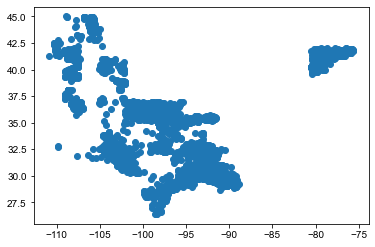

In [168]:
# Create GeoDataFrame from Pandas object
data_gdf = gpd.GeoDataFrame(data2_, geometry=gpd.points_from_xy(data2_.Longitude, data2_.Latitude), crs='epsg:4326')
data_gdf.plot()

In [169]:
segment_sel = [
    'Gathering',
    'Transmission',
    'Storage',
    'Distribution'
    ]
data_gdf_comp = data_gdf[data_gdf.IndustrySegment.isin(segment_sel)]
print ("===========================")
print ("Total # of compressor facilites in dataset = ", data_gdf_comp.shape[0])

Total # of compressor facilites in dataset =  2697


In [170]:
data_gdf_comp.head()

,level_0,level_1,SiteIdentifier,State,County,IndustrySegment,CompanyName,FacilityName,SIC,NAICS,Latitude,Longitude,SiteHP,geometry
0,0,0,73-00998,Arkansas,White,Gathering,Arkansas Midstream Gas Service Corp.,Opal Compressor Station,4922.0,NaN,35.116000,-91.996000,2010.0,POINT (-91.99600 35.11600)
1,0,1,73-01079,Arkansas,White,Gathering,Arkansas Midstream Gas Services Corp.,Little Creek Booster Compressor Station,4922.0,NaN,35.365600,-91.772500,8950.0,POINT (-91.77250 35.36560)
5,0,5,73-01061,Arkansas,White,Gathering,"BHP Billiton Petroleum (Arkansas), Inc.",Beavers Compressor Station,4922.0,NaN,35.416607,-91.784256,3014.0,POINT (-91.78426 35.41661)
6,0,6,12-00453,Arkansas,Cleburne,Gathering,"BHP Billiton Petroleum (Arkansas), Inc.",Geo Compressor Station,4922.0,NaN,35.489612,-91.906379,1412.0,POINT (-91.90638 35.48961)
7,0,7,71-00372,Arkansas,Van Buren,Gathering,"BHP Billiton Petroleum (Arkansas), Inc.",Hilltop Compressor Station,4922.0,NaN,35.634352,-92.392850,10034.0,POINT (-92.39285 35.63435)


In [171]:
# Facility type
data_gdf_comp['fac_type2'] = [data_gdf_comp.IndustrySegment.iloc[x] + " Compressor Station" for x in range(data_gdf_comp.shape[0])]

In [172]:
# Integrate compressor station data
# ===========================================================================
comps_us3, comps_errors_3 = integrate_facs(
    data_gdf_comp,
    starting_ids=comps_us2.OGIM_ID.iloc[-1]+1,
    category="Natural gas compressor stations",
    fac_alias="COMPR_PROC",
    country="United States",
    state_prov="State",
    src_ref_id="90",
    src_date="2015-08-01",
    on_offshore="Onshore",
    fac_name="FacilityName",
    fac_id="SiteIdentifier",
    fac_type="fac_type2",
    spud_date=None,
    comp_date=None,
    drill_type=None,
    install_date=None,
    fac_status=None,
    op_name="CompanyName",
    commodity=None,
    liq_capacity_bpd=None,
    liq_throughput_bpd=None,
    gas_capacity_mmcfd=None,
    gas_throughput_mmcfd=None,
    num_compr_units=None,
    num_storage_tanks=None,
    site_hp="SiteHP",
    fac_latitude="Latitude",
    fac_longitude="Longitude"
    )

100%|████████████████████████████████████████████████████████████████████████████| 2697/2697 [00:01<00:00, 1646.71it/s]


,OGIM_ID,CATEGORY,COUNTRY,STATE_PROV,SRC_REF_ID,SRC_DATE,ON_OFFSHORE,FAC_NAME,FAC_ID,FAC_TYPE,...,LIQ_CAPACITY_BPD,LIQ_THROUGHPUT_BPD,GAS_CAPACITY_MMCFD,GAS_THROUGHPUT_MMCFD,NUM_COMPR_UNITS,NUM_STORAGE_TANKS,SITE_HP,LATITUDE,LONGITUDE,geometry
0,3680547.0,NATURAL GAS COMPRESSOR STATIONS,UNITED STATES,ARKANSAS,90,2015-08-01,ONSHORE,OPAL COMPRESSOR STATION,73-00998,GATHERING COMPRESSOR STATION,...,-999,-999,-999,-999,-999,-999,2010.0,35.116,-91.996,POINT (-91.99600 35.11600)
1,3680548.0,NATURAL GAS COMPRESSOR STATIONS,UNITED STATES,ARKANSAS,90,2015-08-01,ONSHORE,LITTLE CREEK BOOSTER COMPRESSOR STATION,73-01079,GATHERING COMPRESSOR STATION,...,-999,-999,-999,-999,-999,-999,8950.0,35.3656,-91.7725,POINT (-91.77250 35.36560)
2,3680552.0,NATURAL GAS COMPRESSOR STATIONS,UNITED STATES,ARKANSAS,90,2015-08-01,ONSHORE,BEAVERS COMPRESSOR STATION,73-01061,GATHERING COMPRESSOR STATION,...,-999,-999,-999,-999,-999,-999,3014.0,35.41661,-91.78426,POINT (-91.78426 35.41661)
3,3680553.0,NATURAL GAS COMPRESSOR STATIONS,UNITED STATES,ARKANSAS,90,2015-08-01,ONSHORE,GEO COMPRESSOR STATION,12-00453,GATHERING COMPRESSOR STATION,...,-999,-999,-999,-999,-999,-999,1412.0,35.48961,-91.90638,POINT (-91.90638 35.48961)
4,3680554.0,NATURAL GAS COMPRESSOR STATIONS,UNITED STATES,ARKANSAS,90,2015-08-01,ONSHORE,HILLTOP COMPRESSOR STATION,71-00372,GATHERING COMPRESSOR STATION,...,-999,-999,-999,-999,-999,-999,10034.0,35.63435,-92.39285,POINT (-92.39285 35.63435)


### Combine the datasets
 - HIFLD, EPA, Marchese

In [182]:
# Read FRS dataset
# ===============================================
comp_data_all = pd.concat([comps_us, comps_us2, comps_us3]).reset_index()
comp_data_all.head()

,index,OGIM_ID,CATEGORY,COUNTRY,STATE_PROV,SRC_REF_ID,SRC_DATE,ON_OFFSHORE,FAC_NAME,FAC_ID,...,LIQ_CAPACITY_BPD,LIQ_THROUGHPUT_BPD,GAS_CAPACITY_MMCFD,GAS_THROUGHPUT_MMCFD,NUM_COMPR_UNITS,NUM_STORAGE_TANKS,SITE_HP,LATITUDE,LONGITUDE,geometry
0,0,3678517.0,NATURAL GAS COMPRESSOR STATIONS,UNITED STATES,PENNSYLVANIA,87,2022-04-15,ONSHORE,HELVETIA,GCOMP1,...,-999,-999,-999,7.24,1.0,-999,330.0,41.05712,-78.77245,POINT (-78.77245 41.05712)
1,1,3678518.0,NATURAL GAS COMPRESSOR STATIONS,UNITED STATES,PENNSYLVANIA,87,2022-04-15,ONSHORE,NO. 515 BEAR CREEK,GCOMP10,...,-999,-999,-999,426.0,6.0,-999,32000.0,41.17248,-75.67218,POINT (-75.67218 41.17248)
2,2,3678519.0,NATURAL GAS COMPRESSOR STATIONS,UNITED STATES,GEORGIA,87,2022-04-15,ONSHORE,NO. 130 COMER,GCOMP100,...,-999,-999,-999,2830.0,18.0,-999,59290.0,34.15155,-83.14268,POINT (-83.14268 34.15155)
3,3,3678520.0,NATURAL GAS COMPRESSOR STATIONS,UNITED STATES,KANSAS,87,2022-04-15,ONSHORE,583 OTIS,GCOMP1000,...,-999,-999,-999,147.0,1.0,-999,2400.0,38.58436,-99.05227,POINT (-99.05227 38.58436)
4,4,3678521.0,NATURAL GAS COMPRESSOR STATIONS,UNITED STATES,COLORADO,87,2022-04-15,ONSHORE,COLORADO - SKULL CREEK DEW POINT PLANT,GCOMP1001,...,-999,-999,-999,32.5,1.0,-999,100.0,40.95056,-108.31193,POINT (-108.31193 40.95056)


In [260]:
# Remove POTENTIAL duplicates based on FAC_NAME
# ===============================================
unique_fac_names = comp_data_all.FAC_NAME.unique()

# Keep the first entry, which should be the HIFLD dataset if it is part of the duplicate
comp_data_unique = comp_data_all.drop_duplicates(subset='FAC_NAME', keep='first')

print("Length of data for all compressor stations and unique dataset = ", [comp_data_all.shape[0], comp_data_unique.shape[0]])

Length of data for all compressor stations and unique dataset =  [4727, 4357]


In [262]:
# Fix ordering of OGIM id
# ===============================================
new_ogim_id = np.arange(comp_data_all.OGIM_ID.iloc[0], comp_data_all.OGIM_ID.iloc[0]+comp_data_unique.shape[0])

comp_data_unique['OGIM_ID'] = new_ogim_id

comp_data_unique.head()

,index,OGIM_ID,CATEGORY,COUNTRY,STATE_PROV,SRC_REF_ID,SRC_DATE,ON_OFFSHORE,FAC_NAME,FAC_ID,...,LIQ_CAPACITY_BPD,LIQ_THROUGHPUT_BPD,GAS_CAPACITY_MMCFD,GAS_THROUGHPUT_MMCFD,NUM_COMPR_UNITS,NUM_STORAGE_TANKS,SITE_HP,LATITUDE,LONGITUDE,geometry
0,0,3678517.0,NATURAL GAS COMPRESSOR STATIONS,UNITED STATES,PENNSYLVANIA,87,2022-04-15,ONSHORE,HELVETIA,GCOMP1,...,-999,-999,-999,7.24,1.0,-999,330.0,41.05712,-78.77245,POINT (-78.77245 41.05712)
1,1,3678518.0,NATURAL GAS COMPRESSOR STATIONS,UNITED STATES,PENNSYLVANIA,87,2022-04-15,ONSHORE,NO. 515 BEAR CREEK,GCOMP10,...,-999,-999,-999,426.0,6.0,-999,32000.0,41.17248,-75.67218,POINT (-75.67218 41.17248)
2,2,3678519.0,NATURAL GAS COMPRESSOR STATIONS,UNITED STATES,GEORGIA,87,2022-04-15,ONSHORE,NO. 130 COMER,GCOMP100,...,-999,-999,-999,2830.0,18.0,-999,59290.0,34.15155,-83.14268,POINT (-83.14268 34.15155)
3,3,3678520.0,NATURAL GAS COMPRESSOR STATIONS,UNITED STATES,KANSAS,87,2022-04-15,ONSHORE,583 OTIS,GCOMP1000,...,-999,-999,-999,147.0,1.0,-999,2400.0,38.58436,-99.05227,POINT (-99.05227 38.58436)
4,4,3678521.0,NATURAL GAS COMPRESSOR STATIONS,UNITED STATES,COLORADO,87,2022-04-15,ONSHORE,COLORADO - SKULL CREEK DEW POINT PLANT,GCOMP1001,...,-999,-999,-999,32.5,1.0,-999,100.0,40.95056,-108.31193,POINT (-108.31193 40.95056)


In [266]:
# ===========================================================================
comp_data_unique2 = comp_data_unique[['OGIM_ID', 'CATEGORY', 'COUNTRY', 'STATE_PROV', 'SRC_REF_ID',
       'SRC_DATE', 'ON_OFFSHORE', 'FAC_NAME', 'FAC_ID', 'FAC_TYPE',
       'FAC_STATUS', 'OPERATOR', 'INSTALL_DATE', 'COMMODITY',
       'LIQ_CAPACITY_BPD', 'LIQ_THROUGHPUT_BPD', 'GAS_CAPACITY_MMCFD',
       'GAS_THROUGHPUT_MMCFD', 'NUM_COMPR_UNITS', 'NUM_STORAGE_TANKS',
       'SITE_HP', 'LATITUDE', 'LONGITUDE', 'geometry']]

In [267]:
# Save data
# ===========================================================================
save_spatial_data(
    comp_data_unique2, 
    "united_states_natural_gas_compressor_stations", 
    schema_def=True, 
    schema=schema_COMPR_PROC, 
    file_type="GeoJSON", 
    out_path="results\\"
    )


===Successfully saved GeoJSON to specified path===


# Natural gas processing plants <a name="Processing_Plants"></a>
 - Data comes from HIFLD for inter/intra-state processing plant data
 - *There are other datasets from Marchese et al., EPA, EIA, but those should all be included in the HIFLD aggregation*


In [268]:
# HIFLD data
proc_hifld = read_spatial_data("processing_plants\\Natural_Gas_Processing_Plants.geojson")

# Based on information from EIA dataset, the GASCAP and the PLANTFLOW units are MMcfd

---------------------------------------
Total # of features in dataset = 840
Index(['OBJECTID', 'NGPPID', 'NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP', 'ZIP4',
       'TELEPHONE', 'TYPE', 'STATUS', 'POPULATION', 'COUNTY', 'COUNTYFIPS',
       'COUNTRY', 'LATITUDE', 'LONGITUDE', 'NAICS_CODE', 'NAICS_DESC',
       'SOURCE', 'SOURCEDATE', 'VAL_METHOD', 'VAL_DATE', 'WEBSITE', 'FACID',
       'COMPNAME', 'POSREL', 'OPERATOR', 'OPERADDR', 'OPERCITY', 'OPERSTATE',
       'OPERCNTRY', 'OPERZIP', 'OPERPHONE', 'OPERURL', 'GASCAP', 'PROCAMTBLS',
       'BASIN', 'PLANTFLOW', 'BTUCONTENT', 'GASSTORCAP', 'LIQSTORCAP',
       'RMP_ID', 'EPA_ID', 'geometry'],
      dtype='object')


,OBJECTID,NGPPID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,TELEPHONE,TYPE,...,GASCAP,PROCAMTBLS,BASIN,PLANTFLOW,BTUCONTENT,GASSTORCAP,LIQSTORCAP,RMP_ID,EPA_ID,geometry
0,1,NGPP010173,CHUNCHULA GAS PLANT,12303 ROBERTS ROAD,CHUNCHULA,AL,36521,3447,(251) 675-2072,NATURAL GAS PROCESSING PLANT AND NATURAL GAS L...,...,40.0,5538463.0,TX-LA-MS SALT,15.6,1079.0,-999.0,15833.0,1000037676,110007235973,POINT (-88.16820 30.94855)
1,2,NGPP010174,ATMORE TREATING FACILITY,CORNER OF ROSS ROAD AND HAUSS NURSERY ROAD,ATMORE,AL,36502,NOT AVAILABLE,(720) 457-6061,NATURAL GAS PROCESSING PLANT,...,9.0,154110.0,GULF COAST COAL REGION,9.0,1275.0,-999.0,2857.0,1000014456,110041625319,POINT (-87.43715 31.17234)
2,3,NGPP010175,FLARE-BUTLER STREET GAS PLANT,9638 BUTLER STREET,ATMORE,AL,36502,NOT AVAILABLE,(713) 650-8900,NATURAL GAS LIQUIDS EXTRACTION PLANT,...,-999.0,169800.0,GULF COAST COAL REGION,-999.0,-999.0,-999.0,-999.0,1000007214,110000714530,POINT (-87.42975 31.24128)
3,4,NGPP010176,BIG ESCAMBIA CREEK GAS PLANT,3888 SARDIS CHURCH RD,ATMORE,AL,36502,NOT AVAILABLE,(281) 408-1200,NATURAL GAS LIQUIDS EXTRACTION PLANT,...,50.0,5178000.0,TX-LA-MS SALT,29.0,900.0,-999.0,34000.0,1000028621,110000727697,POINT (-87.36302 31.07158)
4,5,NGPP010177,DOGWOOD OAKS PLANT,21680 HWY 41,BREWTON,AL,36426,NOT AVAILABLE,(251) 248-2903,NATURAL GAS PROCESSING PLANT,...,4.0,186840.0,GULF COAST COAL REGION,4.0,1000.0,-999.0,1000.0,1000032802,110055375883,POINT (-87.18784 31.24347)


In [270]:
# Only US data
proc_us = proc_hifld.query("COUNTRY == 'USA'")
print('Total # of records in original dataset = {} compared with US records only = {}'.format(proc_hifld.shape[0], proc_us.shape[0]))

Total # of records in original dataset = 840 compared with US records only = 671


In [273]:
# Transform CRS
proc_us2 = transform_CRS(proc_us, appendLatLon=True)

CRS of original gdf is:  epsg:4326
CRS of new gdf is:  epsg:4326


In [275]:
# Standardize state names
# ===========================================================================
proc_us3 = replace_row_names(proc_us2, "STATE", dict_names=dict_us_states)

Original list of unique attributes =  ['ALABAMA' 'ARKANSAS' 'CALIFORNIA' 'COLORADO' 'FLORIDA' 'HAWAII'
 'ILLINOIS' 'KANSAS' 'KENTUCKY' 'LOUISIANA' 'MICHIGAN' 'MISSISSIPPI'
 'MONTANA' 'NEW MEXICO' 'NORTH DAKOTA' 'OHIO' 'OKLAHOMA' 'PENNSYLVANIA'
 'TENNESSEE' 'TEXAS' 'UTAH' 'WEST VIRGINIA' 'WYOMING']
['ALABAMA' 'ARKANSAS' 'CALIFORNIA' 'COLORADO' 'FLORIDA' 'HAWAII'
 'ILLINOIS' 'KANSAS' 'KENTUCKY' 'LOUISIANA' 'MICHIGAN' 'MISSISSIPPI'
 'MONTANA' 'NEW MEXICO' 'NORTH DAKOTA' 'OHIO' 'OKLAHOMA' 'PENNSYLVANIA'
 'TENNESSEE' 'TEXAS' 'UTAH' 'WEST VIRGINIA' 'WYOMING']


In [277]:
# Fix dates
proc_us4 = standardize_dates_hifld_us(proc_us3, attrName="SOURCEDATE", newAttrName="src_dates")

100%|█████████████████████████████████████████████████████████████████████████████| 671/671 [00:00<00:00, 33547.63it/s]


In [280]:
# Fix STATUS
proc_us5 = replace_row_names(proc_us4, "STATUS", dict_names={'NOT AVAILABLE': 'N/A'})

Original list of unique attributes =  ['ACTIVE' 'NOT AVAILABLE' 'INACTIVE']
['ACTIVE' 'N/A' 'INACTIVE']


In [282]:
# Plant type
proc_us6 = replace_row_names(proc_us5, "TYPE", dict_names={'NOT AVAILABLE': 'N/A'})

Original list of unique attributes =  ['NATURAL GAS PROCESSING PLANT AND NATURAL GAS LIQUIDS STORAGE'
 'NATURAL GAS PROCESSING PLANT' 'NATURAL GAS LIQUIDS EXTRACTION PLANT'
 'NATURAL GAS LIQUIDS STORAGE'
 'CRUDE PETROLEUM AND NATURAL GAS EXTRACTION, NATURAL GAS LIQUIDS EXTRACTION PLANT'
 'NATURAL GAS PROCESSING AND NATURAL GAS LIQUIDS EXTRACTION PLANT'
 'CRUDE PETROLEUM AND NATURAL GAS EXTRACTION PLANT'
 'NATURAL GAS PROCESSING PLANT AND PROPANE STORAGE'
 'DEW POINT CONTROL AND NATURAL GAS PROCESSING PLANT'
 'NATURAL GAS LIQUIDS EXTRACTION AND PROCESSING PLANT'
 'SYNTHETIC (NAPHTHA) NATURAL GAS PLANT'
 'NATURAL GAS LIQUIDS EXTRACTION AND FRACTIONATION PLANT'
 'NATURAL GAS LIQUIDS EXTRACTION PLANT AND STORAGE'
 'SOUR NATURAL GAS PROCESSING PLANT'
 'CRYOGENIC NATURAL GAS PROCESSING PLANT'
 'HP RECEIVER AND NATURAL GAS PROCESSING PLANT'
 'NATURAL GAS PROCESSING AND CO2 RECOVERY PLANT'
 'NATURAL GAS PLANT - 1 PROCESS'
 'NATURAL GAS LIQUIDS EXTRACTION PLANT, PIPELINE TRANSPORTATION OF NATUR

In [285]:
# Integrate processing plant data
# ===========================================================================
proc_us7, proc_errors_3 = integrate_facs(
    proc_us6,
    starting_ids=comp_data_unique2.OGIM_ID.iloc[-1]+1,
    category="Gathering and processing",
    fac_alias="COMPR_PROC",
    country="United States",
    state_prov="STATE",
    src_ref_id="91",
    src_date="src_dates",
    on_offshore="Onshore",
    fac_name="NAME",
    fac_id="NGPPID",
    fac_type="TYPE",
    spud_date=None,
    comp_date=None,
    drill_type=None,
    install_date=None,
    fac_status=None,
    op_name="OPERATOR",
    commodity=None,
    liq_capacity_bpd=None,
    liq_throughput_bpd=None,
    gas_capacity_mmcfd="GASCAP",
    gas_throughput_mmcfd="PLANTFLOW",
    num_compr_units=None,
    num_storage_tanks=None,
    site_hp=None,
    fac_latitude="latitude_calc",
    fac_longitude="longitude_calc"
    )

100%|██████████████████████████████████████████████████████████████████████████████| 671/671 [00:00<00:00, 1664.37it/s]


,OGIM_ID,CATEGORY,COUNTRY,STATE_PROV,SRC_REF_ID,SRC_DATE,ON_OFFSHORE,FAC_NAME,FAC_ID,FAC_TYPE,...,LIQ_CAPACITY_BPD,LIQ_THROUGHPUT_BPD,GAS_CAPACITY_MMCFD,GAS_THROUGHPUT_MMCFD,NUM_COMPR_UNITS,NUM_STORAGE_TANKS,SITE_HP,LATITUDE,LONGITUDE,geometry
0,3682874.0,GATHERING AND PROCESSING,UNITED STATES,ALABAMA,91,2014-01-08,ONSHORE,CHUNCHULA GAS PLANT,NGPP010173,NATURAL GAS PROCESSING PLANT AND NATURAL GAS L...,...,-999,-999,40.0,15.6,-999,-999,-999,30.94855,-88.1682,POINT (-88.16820 30.94855)
1,3682875.0,GATHERING AND PROCESSING,UNITED STATES,ALABAMA,91,2019-01-01,ONSHORE,ATMORE TREATING FACILITY,NGPP010174,NATURAL GAS PROCESSING PLANT,...,-999,-999,9.0,9.0,-999,-999,-999,31.17234,-87.43715,POINT (-87.43715 31.17234)
2,3682876.0,GATHERING AND PROCESSING,UNITED STATES,ALABAMA,91,2009-06-16,ONSHORE,FLARE-BUTLER STREET GAS PLANT,NGPP010175,NATURAL GAS LIQUIDS EXTRACTION PLANT,...,-999,-999,-999.0,-999.0,-999,-999,-999,31.24128,-87.42975,POINT (-87.42975 31.24128)
3,3682877.0,GATHERING AND PROCESSING,UNITED STATES,ALABAMA,91,2019-01-01,ONSHORE,BIG ESCAMBIA CREEK GAS PLANT,NGPP010176,NATURAL GAS LIQUIDS EXTRACTION PLANT,...,-999,-999,50.0,29.0,-999,-999,-999,31.07158,-87.36302,POINT (-87.36302 31.07158)
4,3682878.0,GATHERING AND PROCESSING,UNITED STATES,ALABAMA,91,2013-03-22,ONSHORE,DOGWOOD OAKS PLANT,NGPP010177,NATURAL GAS PROCESSING PLANT,...,-999,-999,4.0,4.0,-999,-999,-999,31.24347,-87.18784,POINT (-87.18784 31.24347)


In [286]:
# Save data
# ===========================================================================
save_spatial_data(
    proc_us7, 
    "united_states_gathering_processing", 
    schema_def=True, 
    schema=schema_COMPR_PROC, 
    file_type="GeoJSON", 
    out_path="results\\"
    )

===Successfully saved GeoJSON to specified path===


# LNG import/export terminals <a name="LNG"></a>
 - Data comes from HIFLD for LNG
 - Also, includes EIA data

In [288]:
# ===========================================================================
ln_01 = read_spatial_data("lng_import_export_terminals\\LNG_Import_Export_Terminals.gdb")
# Also, based on EIA data, the units here are bcfd for storage, storage capacity, current capacity

---------------------------------------
Total # of features in dataset = 25
Index(['TERMID', 'NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP', 'ZIP4',
       'TELEPHONE', 'TYPE', 'STATUS', 'POPULATION', 'COUNTY', 'COUNTYFIPS',
       'COUNTRY', 'LATITUDE', 'LONGITUDE', 'NAICS_CODE', 'NAICS_DESC',
       'SOURCE', 'SOURCEDATE', 'VAL_METHOD', 'VAL_DATE', 'WEBSITE', 'EPA_ID',
       'ALT_NAME', 'OWNER', 'POSREL', 'JRSDCTN', 'CONTYPE', 'IE_PORT',
       'BERTHS', 'STORAGE', 'STORCAP', 'CURRENTCAP', 'APPCAP', 'OPYEAR',
       'IMPEXPCTRY', 'VOLUME', 'PRICE', 'geometry'],
      dtype='object')


,TERMID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,TELEPHONE,TYPE,STATUS,...,BERTHS,STORAGE,STORCAP,CURRENTCAP,APPCAP,OPYEAR,IMPEXPCTRY,VOLUME,PRICE,geometry
0,ANLLNG02001,CONOCOPHILLIPS KENAI LNG PLANT,48237 KENAI SPUR HIGHWAY,KENAI,AK,99611,NOT AVAILABLE,NOT AVAILABLE,EXPORT,IN SERVICE,...,1,3,2.2,0.2,-999.0,1969,NOT APPLICABLE,0.0,0.0,POINT (-151.38340 60.67870)
1,ANLLNG13001,SLNG STATION 9999 ELBA ISLAND (IMPORT),ELBA ISLAND ROAD,SAVANNAH,GA,31404,NOT AVAILABLE,NOT AVAILABLE,IMPORT,IN SERVICE,...,2,5,11.3,1.6,-999.0,1978,TTO,14.5,4.2,POINT (-80.99581 32.08613)
2,ANLLNG22001,CAMERON LNG LLC - CAMERON LNG IMPORT FACILITY,301 N MAIN STREET,HACKBERRY,LA,70645,5012,NOT AVAILABLE,IMPORT,IN SERVICE,...,2,3,10.1,1.8,-999.0,2009,NOT APPLICABLE,0.0,0.0,POINT (-93.33649 30.03741)
3,ANLLNG22002,LAKE CHARLES TERMINAL,8100 BIG LAKE ROAD,LAKE CHARLES,LA,70605,0300,NOT AVAILABLE,IMPORT,IN SERVICE,...,2,4,9.0,2.1,-999.0,1982,NOT APPLICABLE,0.0,0.0,POINT (-93.28822 30.11296)
4,ANLLNG22003,SABINE PASS LNG LP - SABINE PASS LNG IMPORT TE...,9243 GULF BEACH HIGHWAY,CAMERON,LA,70631,4019,NOT AVAILABLE,IMPORT,IN SERVICE,...,2,5,16.9,4.0,-999.0,2008,NOT APPLICABLE,0.0,0.0,POINT (-93.87039 29.74822)


In [296]:
# Select US
lng_us = ln_01.query("COUNTRY=='USA'")

In [297]:
# Fix state names
lng_us2 = replace_row_names(lng_us, "STATE", dict_names=dict_us_states)

Original list of unique attributes =  ['AK' 'GA' 'LA' 'MA' 'MD' 'MS' 'TX' 'PR' 'FL']
['ALASKA' 'GEORGIA' 'LOUISIANA' 'MASSACHUSETTS' 'MARYLAND' 'MISSISSIPPI'
 'TEXAS' 'PR' 'FLORIDA']


In [298]:
# Fix source dates
lng_us2.STATUS.unique()

array(['IN SERVICE', 'SUSPENDED', 'UNDER CONSTRUCTION'], dtype=object)

In [299]:
# Fix dates
lng_us3 = standardize_dates_hifld_us(lng_us2, attrName="SOURCEDATE", newAttrName="src_dates")

100%|███████████████████████████████████████████████████████████████████████████████| 23/23 [00:00<00:00, 11500.83it/s]


In [302]:
# Check and transform CRS if needed
lng_us4 = transform_CRS(lng_us3, appendLatLon=True)

CRS of original gdf is:  epsg:4326
CRS of new gdf is:  epsg:4326


In [323]:
# Convert capacities to MMcfd
lng_us4['capacity_mmcfd'] = lng_us4['STORCAP']*1000
lng_us4['thru_mmcfd'] = lng_us4['CURRENTCAP']*1000

In [324]:
# Integrate processing plant data
# ===========================================================================
lng_us7, lng_errors_3 = integrate_facs(
    lng_us4,
    starting_ids=proc_us7.OGIM_ID.iloc[-1]+1,
    category="LNG FACILITY",
    fac_alias="LNG_STORAGE",
    country="United States",
    state_prov="STATE",
    src_ref_id="92",
    src_date="src_dates",
    on_offshore="Onshore",
    fac_name="NAME",
    fac_id="TERMID",
    fac_type="TYPE",
    spud_date=None,
    comp_date=None,
    drill_type=None,
    install_date=None,
    fac_status=None,
    op_name="OWNER",
    commodity=None,
    liq_capacity_bpd=None,
    liq_throughput_bpd=None,
    gas_capacity_mmcfd="capacity_mmcfd",
    gas_throughput_mmcfd="thru_mmcfd",
    num_compr_units=None,
    num_storage_tanks=None,
    site_hp=None,
    fac_latitude="latitude_calc",
    fac_longitude="longitude_calc"
    )

100%|████████████████████████████████████████████████████████████████████████████████| 23/23 [00:00<00:00, 1438.42it/s]


,OGIM_ID,CATEGORY,COUNTRY,STATE_PROV,SRC_REF_ID,SRC_DATE,ON_OFFSHORE,FAC_NAME,FAC_ID,FAC_TYPE,...,INSTALL_DATE,COMMODITY,LIQ_CAPACITY_BPD,LIQ_THROUGHPUT_BPD,GAS_CAPACITY_MMCFD,GAS_THROUGHPUT_MMCFD,NUM_STORAGE_TANKS,LATITUDE,LONGITUDE,geometry
0,3683647.0,LNG FACILITY,UNITED STATES,ALASKA,92,2019-10-08,ONSHORE,CONOCOPHILLIPS KENAI LNG PLANT,ANLLNG02001,EXPORT,...,1900-01-01,N/A,-999,-999,2200.0,200.0,-999,60.6787,-151.3834,POINT (-151.38340 60.67870)
1,3683648.0,LNG FACILITY,UNITED STATES,GEORGIA,92,2019-10-08,ONSHORE,SLNG STATION 9999 ELBA ISLAND (IMPORT),ANLLNG13001,IMPORT,...,1900-01-01,N/A,-999,-999,11300.0,1600.0,-999,32.08613,-80.99581,POINT (-80.99581 32.08613)
2,3683649.0,LNG FACILITY,UNITED STATES,LOUISIANA,92,2019-10-08,ONSHORE,CAMERON LNG LLC - CAMERON LNG IMPORT FACILITY,ANLLNG22001,IMPORT,...,1900-01-01,N/A,-999,-999,10100.0,1800.0,-999,30.03741,-93.33649,POINT (-93.33649 30.03741)
3,3683650.0,LNG FACILITY,UNITED STATES,LOUISIANA,92,2019-10-08,ONSHORE,LAKE CHARLES TERMINAL,ANLLNG22002,IMPORT,...,1900-01-01,N/A,-999,-999,9000.0,2100.0,-999,30.11296,-93.28822,POINT (-93.28822 30.11296)
4,3683651.0,LNG FACILITY,UNITED STATES,LOUISIANA,92,2019-10-08,ONSHORE,SABINE PASS LNG LP - SABINE PASS LNG IMPORT TE...,ANLLNG22003,IMPORT,...,1900-01-01,N/A,-999,-999,16900.0,4000.0,-999,29.74822,-93.87039,POINT (-93.87039 29.74822)


In [325]:
# Save data
# ===========================================================================
save_spatial_data(
    lng_us7, 
    "united_states_lng_facility", 
    schema_def=True, 
    schema=schema_LNG_STORAGE, 
    file_type="GeoJSON", 
    out_path="results\\"
    )

===Successfully saved GeoJSON to specified path===


# Petroleum terminals <a name="Terminals"></a>
 - Data comes from HIFLD 

In [308]:
terms_ = read_spatial_data("petroleum_terminals\\Petroleum_Terminals.geojson")

---------------------------------------
Total # of features in dataset = 2338
Index(['OBJECTID', 'TERM_ID', 'NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP',
       'ZIP4', 'TELEPHONE', 'TYPE', 'STATUS', 'POPULATION', 'COUNTY',
       'COUNTYFIPS', 'COUNTRY', 'LATITUDE', 'LONGITUDE', 'NAICS_CODE',
       'NAICS_DESC', 'SOURCE', 'SOURCEDATE', 'VAL_METHOD', 'VAL_DATE',
       'WEBSITE', 'EXSTARS_I', 'OWNER', 'OPERATOR', 'POSREL', 'COMMODITY',
       'CAPACITY', 'TRUCK_IN', 'TRUCK_OUT', 'PIPE_IN', 'PIPE_OUT', 'MARINE_IN',
       'MARINE_OUT', 'RAIL_IN', 'RAIL_OUT', 'ASPHALT', 'CHEMICALS', 'PROPANE',
       'BUTANE', 'REFINED', 'ETHANOL', 'BIODIESEL', 'CRUDE_OIL', 'JETFUEL',
       'GASOLINE', 'DISTILLATE', 'AVGAS', 'geometry'],
      dtype='object')


,OBJECTID,TERM_ID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,TELEPHONE,TYPE,...,BUTANE,REFINED,ETHANOL,BIODIESEL,CRUDE_OIL,JETFUEL,GASOLINE,DISTILLATE,AVGAS,geometry
0,1,ANLTK01001,"MURPHY OIL USA, INCORPORATED - ANNISTON TERMINAL",2625 HIGHWAY 78 EAST,ANNISTON,AL,36207,NOT AVAILABLE,(256) 831-0201,BULK TERMINAL,...,NO,YES,NOT AVAILABLE,NOT AVAILABLE,NO,NO,NO,YES,NOT AVAILABLE,POINT (-85.77631 33.61589)
1,2,ANLTK01002,PLANTATION PIPELINE COMPANY - OXFORD TERMINAL,114 CHEVRON RD,ANNISTON,AL,36207,NOT AVAILABLE,(256) 831-2621,BREAKOUT TANKS - PRODUCTS,...,NO,NO,NOT AVAILABLE,NOT AVAILABLE,NO,NO,NO,NO,NOT AVAILABLE,POINT (-85.78035 33.61673)
2,3,ANLTK01003,GOODWAY REFINING LLC,4745 ROSS ROAD,ATMORE,AL,36502,NOT AVAILABLE,(337) 302-3121,REFINERY TERMINAL,...,NO,YES,NOT AVAILABLE,NOT AVAILABLE,YES,YES,NO,YES,NO,POINT (-87.44012 31.18090)
3,4,ANLTK01004,ALLIED ENERGY COMPANY LLC,2700 ISHKOODA-WENONAH ROAD,BIRMINGHAM,AL,35211,NOT AVAILABLE,(205) 925-6230,BULK TERMINAL,...,NO,YES,YES,YES,NO,YES,YES,YES,NO,POINT (-86.87623 33.45113)
4,5,ANLTK01005,CHEVRON PRODUCTS COMPANY,2400 28TH STREET SW,BIRMINGHAM,AL,35211,NOT AVAILABLE,(205) 925-3916,BULK TERMINAL,...,NO,YES,NOT AVAILABLE,NOT AVAILABLE,NO,YES,NO,NO,NOT AVAILABLE,POINT (-86.87897 33.45867)


In [309]:
# Select US
terms_us = terms_.query("COUNTRY=='USA'")

In [311]:
# Fix state names
terms_us2 = replace_row_names(terms_us, "STATE", dict_names=dict_us_states)

Original list of unique attributes =  ['AL' 'AK' 'AZ' 'AR' 'CA' 'CO' 'CT' 'DE' 'FL' 'GA' 'HI' 'ID' 'IL' 'IN'
 'IA' 'KS' 'KY' 'LA' 'ME' 'MD' 'MA' 'MI' 'MN' 'MS' 'MO' 'MT' 'NE' 'NV'
 'NH' 'NJ' 'NM' 'NY' 'NC' 'ND' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD' 'TN'
 'TX' 'UT' 'VT' 'VA' 'WA' 'WV' 'WI' 'WY' 'GM' 'MP' 'PR' 'VI']
['ALABAMA' 'ALASKA' 'ARIZONA' 'ARKANSAS' 'CALIFORNIA' 'COLORADO'
 'CONNECTICUT' 'DELAWARE' 'FLORIDA' 'GEORGIA' 'HAWAII' 'IDAHO' 'ILLINOIS'
 'INDIANA' 'IOWA' 'KANSAS' 'KENTUCKY' 'LOUISIANA' 'MAINE' 'MARYLAND'
 'MASSACHUSETTS' 'MICHIGAN' 'MINNESOTA' 'MISSISSIPPI' 'MISSOURI' 'MONTANA'
 'NEBRASKA' 'NEVADA' 'NEW HAMPSHIRE' 'NEW JERSEY' 'NEW MEXICO' 'NEW YORK'
 'NORTH CAROLINA' 'NORTH DAKOTA' 'OHIO' 'OKLAHOMA' 'OREGON' 'PENNSYLVANIA'
 'RHODE ISLAND' 'SOUTH CAROLINA' 'TENNESSEE' 'TEXAS' 'UTAH' 'VERMONT'
 'VIRGINIA' ' WASHINGTON' 'WEST VIRGINIA' 'WISCONSIN' 'WYOMING' 'GM' 'MP'
 'PR' 'VI']


In [312]:
# Fix dates
terms_us3 = standardize_dates_hifld_us(terms_us2, attrName="SOURCEDATE", newAttrName="src_dates")

100%|███████████████████████████████████████████████████████████████████████████| 2338/2338 [00:00<00:00, 37709.51it/s]


In [313]:
terms_us4 = transform_CRS(terms_us3, appendLatLon=True)

CRS of original gdf is:  epsg:4326
CRS of new gdf is:  epsg:4326


In [317]:
terms_us5 = replace_row_names(terms_us4, "COMMODITY", dict_names={'NOT AVAILABLE':'N/A'})

Original list of unique attributes =  ['REFINED, CHEMICALS' 'NOT AVAILABLE' 'CRUDE, REFINED, CHEMICALS'
 'REFINED, BIOFUEL, CHEMICALS' 'REFINED' 'REFINED, ASPHALT' 'CRUDE'
 'ASPHALT' 'CRUDE, ASPHALT, CHEMICALS'
 'CRUDE, REFINED, BIOFUEL, CHEMICALS'
 'CRUDE, REFINED, ASPHALT, BIOFUEL, CHEMICALS' 'CRUDE, REFINED'
 'CRUDE, REFINED, ASPHALT, CHEMICALS' 'CRUDE, CHEMICALS' 'CRUDE, ASPHALT'
 'BIOFUEL' 'CRUDE, REFINED, ASPHALT' 'REFINED, ASPHALT, CHEMICALS'
 'CHEMICALS' 'ASPHALT, CHEMICALS' 'REFINED, BIOFUEL'
 'REFINED, ASPHALT, BIOFUEL, CHEMICALS' 'ASPHALT, CRUDE'
 'REFINED, ASPHALT, BIOFUEL' 'REFINED, BIOFUEL, ASPHALT, CHEMICALS'
 'CRUDE, BIOFUEL, CHEMICALS' 'CHEMICALS; REFINED']
['REFINED, CHEMICALS' 'N/A' 'CRUDE, REFINED, CHEMICALS'
 'REFINED, BIOFUEL, CHEMICALS' 'REFINED' 'REFINED, ASPHALT' 'CRUDE'
 'ASPHALT' 'CRUDE, ASPHALT, CHEMICALS'
 'CRUDE, REFINED, BIOFUEL, CHEMICALS'
 'CRUDE, REFINED, ASPHALT, BIOFUEL, CHEMICALS' 'CRUDE, REFINED'
 'CRUDE, REFINED, ASPHALT, CHEMICALS' 'CRUDE, CHEMIC

In [320]:
# Integrate terminals
# ===========================================================================
terms_us7, terms_errors_3 = integrate_facs(
    terms_us5,
    starting_ids=lng_us7.OGIM_ID.iloc[-1]+1,
    category="PETROLEUM TERMINALS",
    fac_alias="LNG_STORAGE",
    country="United States",
    state_prov="STATE",
    src_ref_id="93",
    src_date="src_dates",
    on_offshore="Onshore",
    fac_name="NAME",
    fac_id="TERM_ID",
    fac_type="TYPE",
    spud_date=None,
    comp_date=None,
    drill_type=None,
    install_date=None,
    fac_status=None,
    op_name="OPERATOR",
    commodity="COMMODITY",
    liq_capacity_bpd=None,
    liq_throughput_bpd=None,
    gas_capacity_mmcfd=None,
    gas_throughput_mmcfd=None,
    num_compr_units=None,
    num_storage_tanks=None,
    site_hp=None,
    fac_latitude="latitude_calc",
    fac_longitude="longitude_calc"
    )

100%|████████████████████████████████████████████████████████████████████████████| 2338/2338 [00:01<00:00, 1597.60it/s]


,OGIM_ID,CATEGORY,COUNTRY,STATE_PROV,SRC_REF_ID,SRC_DATE,ON_OFFSHORE,FAC_NAME,FAC_ID,FAC_TYPE,...,INSTALL_DATE,COMMODITY,LIQ_CAPACITY_BPD,LIQ_THROUGHPUT_BPD,GAS_CAPACITY_MMCFD,GAS_THROUGHPUT_MMCFD,NUM_STORAGE_TANKS,LATITUDE,LONGITUDE,geometry
0,3683672.0,PETROLEUM TERMINALS,UNITED STATES,ALABAMA,93,2015-07-27,ONSHORE,"MURPHY OIL USA, INCORPORATED - ANNISTON TERMINAL",ANLTK01001,BULK TERMINAL,...,1900-01-01,"REFINED, CHEMICALS",-999,-999,-999,-999,-999,33.61589,-85.77631,POINT (-85.77631 33.61589)
1,3683673.0,PETROLEUM TERMINALS,UNITED STATES,ALABAMA,93,2015-07-27,ONSHORE,PLANTATION PIPELINE COMPANY - OXFORD TERMINAL,ANLTK01002,BREAKOUT TANKS - PRODUCTS,...,1900-01-01,N/A,-999,-999,-999,-999,-999,33.61673,-85.78035,POINT (-85.78035 33.61673)
2,3683674.0,PETROLEUM TERMINALS,UNITED STATES,ALABAMA,93,2015-07-27,ONSHORE,GOODWAY REFINING LLC,ANLTK01003,REFINERY TERMINAL,...,1900-01-01,"CRUDE, REFINED, CHEMICALS",-999,-999,-999,-999,-999,31.1809,-87.44012,POINT (-87.44012 31.18090)
3,3683675.0,PETROLEUM TERMINALS,UNITED STATES,ALABAMA,93,2015-07-27,ONSHORE,ALLIED ENERGY COMPANY LLC,ANLTK01004,BULK TERMINAL,...,1900-01-01,"REFINED, BIOFUEL, CHEMICALS",-999,-999,-999,-999,-999,33.45113,-86.87623,POINT (-86.87623 33.45113)
4,3683676.0,PETROLEUM TERMINALS,UNITED STATES,ALABAMA,93,2015-07-27,ONSHORE,CHEVRON PRODUCTS COMPANY,ANLTK01005,BULK TERMINAL,...,1900-01-01,"REFINED, CHEMICALS",-999,-999,-999,-999,-999,33.45867,-86.87897,POINT (-86.87897 33.45867)


In [326]:
# Save data
# ===========================================================================
save_spatial_data(
    terms_us7, 
    "united_states_petroleum_terminals", 
    schema_def=True, 
    schema=schema_LNG_STORAGE, 
    file_type="GeoJSON", 
    out_path="results\\"
    )

===Successfully saved GeoJSON to specified path===


# Crude oil refineries <a name="Refineries"></a>
 - Data comes from HIFLD 

In [327]:
ref_ = read_spatial_data("refineries\\Oil_Refineries.geojson") # CAPACITY in bpd

---------------------------------------
Total # of features in dataset = 155
Index(['OBJECTID', 'REF_ID', 'NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP', 'ZIP4',
       'TELEPHONE', 'TYPE', 'STATUS', 'POPULATION', 'COUNTY', 'COUNTYFIPS',
       'COUNTRY', 'LATITUDE', 'LONGITUDE', 'NAICS_CODE', 'NAICS_DESC',
       'SOURCE', 'SOURCEDATE', 'VAL_METHOD', 'VAL_DATE', 'WEBSITE', 'OWNER',
       'OPERNAME', 'RMP_ID', 'EPA_ID', 'POSREL', 'CAPACITY', 'US_RANK',
       'CRUDE', 'VACDIST', 'COKING', 'THERMALOP', 'CATCRACK', 'CATREFORM',
       'CATHYDCRCK', 'CATHYDTRT', 'ALKY', 'POLDIM', 'AROMATIC', 'ISOMER',
       'LUBES', 'OXYGENATES', 'HYDRGN', 'COKE', 'SULFUR', 'ASPHALT',
       'geometry'],
      dtype='object')


,OBJECTID,REF_ID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,TELEPHONE,TYPE,...,POLDIM,AROMATIC,ISOMER,LUBES,OXYGENATES,HYDRGN,COKE,SULFUR,ASPHALT,geometry
0,1,REF210002,SOMERSET,300 REFINERY ROAD,SOMERSET,KY,42501,2974,(606) 679-6301,VERY SMALL REFINERY,...,0,0,0,0,0,0,0,0,0,POINT (-84.60951 37.07113)
1,2,REF490003,WOODS CROSS,2355 SOUTH 1100 WEST,WOODS CROSS,UT,84087,NOT AVAILABLE,(801) 298-3211,VERY SMALL SIMPLE REFINERY,...,0,0,0,0,0,0,0,0,0,POINT (-111.91000 40.86776)
2,3,REF080004,COMMERCE CITY EAST,5801 BRIGHTON BLVD,COMMERCE CITY,CO,80022,NOT AVAILABLE,(303) 286-5788,SMALL SIMPLE REFINERY,...,0,0,1970,0,0,0,0,2,0,POINT (-104.94518 39.80175)
3,4,REF480005,SAN ANTONIO,7811 S PRESA STREET,SAN ANTONIO,TX,78223,3547,(210) 918-7414,SMALL LUBRICANTS REFINERY,...,0,0,0,0,0,0,0,0,0,POINT (-98.46019 29.34757)
4,5,REF340007,PAULSBORO,800 BILLINGSPORT ROAD,PAULSBORO,NJ,08027,1036,(856) 224-4354,LARGE HIGHLY COMPLEX REFINERY,...,0,0,0,12000,0,9,7500,280,21000,POINT (-75.25681 39.84038)


In [328]:
# Extract only US data
ref_us = ref_.query("COUNTRY=='USA'")

In [330]:
# Fix state names
ref_us2 = replace_row_names(ref_us, "STATE", dict_names=dict_us_states)

Original list of unique attributes =  ['KY' 'UT' 'CO' 'TX' 'NJ' 'LA' 'OH' 'WY' 'CA' 'OK' 'IN' 'WV' 'MN' 'PA'
 'HI' 'WA' 'MT' 'MS' 'NM' 'AL' 'AR' 'IL' 'AK' 'DE' 'WI' 'KS' 'ND' 'MI'
 'TN' 'NV']
['KENTUCKY' 'UTAH' 'COLORADO' 'TEXAS' 'NEW JERSEY' 'LOUISIANA' 'OHIO'
 'WYOMING' 'CALIFORNIA' 'OKLAHOMA' 'INDIANA' 'WEST VIRGINIA' 'MINNESOTA'
 'PENNSYLVANIA' 'HAWAII' ' WASHINGTON' 'MONTANA' 'MISSISSIPPI'
 'NEW MEXICO' 'ALABAMA' 'ARKANSAS' 'ILLINOIS' 'ALASKA' 'DELAWARE'
 'WISCONSIN' 'KANSAS' 'NORTH DAKOTA' 'MICHIGAN' 'TENNESSEE' 'NEVADA']


In [331]:
# Fix dates
ref_us3 = standardize_dates_hifld_us(ref_us2, attrName="SOURCEDATE", newAttrName="src_dates")

100%|█████████████████████████████████████████████████████████████████████████████| 144/144 [00:00<00:00, 35964.02it/s]


In [332]:
# Check and transform CRS if needed
ref_us4 = transform_CRS(ref_us3, appendLatLon=True)

CRS of original gdf is:  epsg:4326
CRS of new gdf is:  epsg:4326


In [333]:
# Fix dates
ref_us5 = standardize_dates_hifld_us(ref_us4, attrName="SOURCEDATE", newAttrName="src_dates")

100%|█████████████████████████████████████████████████████████████████████████████| 144/144 [00:00<00:00, 28802.09it/s]


In [336]:
# Integrate refineries
# ===========================================================================
ref_us7, ref_errors_3 = integrate_facs(
    ref_us5,
    starting_ids=terms_us7.OGIM_ID.iloc[-1]+1,
    category="CRUDE OIL REFINERY",
    fac_alias="REFINERY",
    country="United States",
    state_prov="STATE",
    src_ref_id="94",
    src_date="src_dates",
    on_offshore="Onshore",
    fac_name="NAME",
    fac_id="REF_ID",
    fac_type="TYPE",
    spud_date=None,
    comp_date=None,
    drill_type=None,
    install_date=None,
    fac_status=None,
    op_name="OPERNAME",
    commodity=None,
    liq_capacity_bpd="CAPACITY",
    liq_throughput_bpd=None,
    gas_capacity_mmcfd=None,
    gas_throughput_mmcfd=None,
    num_compr_units=None,
    num_storage_tanks=None,
    site_hp=None,
    fac_latitude="latitude_calc",
    fac_longitude="longitude_calc"
    )

100%|██████████████████████████████████████████████████████████████████████████████| 144/144 [00:00<00:00, 1618.46it/s]


,OGIM_ID,CATEGORY,COUNTRY,STATE_PROV,SRC_REF_ID,SRC_DATE,ON_OFFSHORE,FAC_NAME,FAC_ID,FAC_TYPE,FAC_STATUS,OPERATOR,INSTALL_DATE,COMMODITY,LIQ_CAPACITY_BPD,LIQ_THROUGHPUT_BPD,NUM_STORAGE_TANKS,LATITUDE,LONGITUDE,geometry
0,3686010.0,CRUDE OIL REFINERY,UNITED STATES,KENTUCKY,94,2017-01-01,ONSHORE,SOMERSET,REF210002,VERY SMALL REFINERY,N/A,CONTINENTAL REFINING COMPANY LLC,1900-01-01,N/A,5500,-999,-999,37.07113,-84.60951,POINT (-84.60951 37.07113)
1,3686011.0,CRUDE OIL REFINERY,UNITED STATES,UTAH,94,2017-01-01,ONSHORE,WOODS CROSS,REF490003,VERY SMALL SIMPLE REFINERY,N/A,SILVER EAGLE REFINING,1900-01-01,N/A,15000,-999,-999,40.86776,-111.91,POINT (-111.91000 40.86776)
2,3686012.0,CRUDE OIL REFINERY,UNITED STATES,COLORADO,94,2017-01-01,ONSHORE,COMMERCE CITY EAST,REF080004,SMALL SIMPLE REFINERY,N/A,SUNCOR ENERGY (USA) INC,1900-01-01,N/A,36000,-999,-999,39.80175,-104.94518,POINT (-104.94518 39.80175)
3,3686013.0,CRUDE OIL REFINERY,UNITED STATES,TEXAS,94,2017-01-01,ONSHORE,SAN ANTONIO,REF480005,SMALL LUBRICANTS REFINERY,N/A,CALUMET LUBRICANTS CO,1900-01-01,N/A,20000,-999,-999,29.34757,-98.46019,POINT (-98.46019 29.34757)
4,3686014.0,CRUDE OIL REFINERY,UNITED STATES,NEW JERSEY,94,2017-01-01,ONSHORE,PAULSBORO,REF340007,LARGE HIGHLY COMPLEX REFINERY,N/A,PAULSBORO REFINING CO LLC,1900-01-01,N/A,160000,-999,-999,39.84038,-75.25681,POINT (-75.25681 39.84038)


In [337]:
# Save data
# ===========================================================================
save_spatial_data(
    ref_us7, 
    "united_states_crude_oil_refineries", 
    schema_def=True, 
    schema=schema_REFINERY, 
    file_type="GeoJSON", 
    out_path="results\\"
    )

===Successfully saved GeoJSON to specified path===


# Stations - other <a name="Stations_Other"></a>
 - Data comes from HIFLD 

In [338]:
# HIFLD data
# ===========================================================================
stns_ = read_spatial_data("pumping_stations\\POL_Pumping_Station.geojson")

---------------------------------------
Total # of features in dataset = 1623
Index(['OBJECTID', 'PUMPID', 'NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP', 'ZIP4',
       'TELEPHONE', 'TYPE', 'STATUS', 'COUNTY', 'COUNTYFIPS', 'COUNTRY',
       'LATITUDE', 'LONGITUDE', 'NAICS_CODE', 'NAICS_DESC', 'SOURCE',
       'SOURCEDATE', 'VAL_METHOD', 'VAL_DATE', 'WEBSITE', 'UNITNAME', 'OWNER',
       'OPERATOR', 'POSREL', 'COMMODITY', 'EPA_ID', 'OPERATORID', 'UNIT_ID',
       'GlobalID', 'geometry'],
      dtype='object')


,OBJECTID,PUMPID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,TELEPHONE,TYPE,...,UNITNAME,OWNER,OPERATOR,POSREL,COMMODITY,EPA_ID,OPERATORID,UNIT_ID,GlobalID,geometry
0,1,ANLPPS010001,HEFLIN,6182 HIGHWAY 46,HEFLIN,AL,36264,NOT AVAILABLE,NOT AVAILABLE,POL PUMPING STATION,...,AL,COLONIAL PIPELINE CO,COLONIAL PIPELINE CO,WITHIN 40 FEET,REFINED PRODUCT,110042850554,-999,-999.0,{722C0F1D-93A5-42DF-8849-278DBE13792D},POINT (-85.51444 33.64844)
1,2,ANLPPS010002,MOUNDVILLE,21120 COUNTY ROAD 21; 21120 POWERS LOOP ROAD,MOUNDVILLE,AL,35474,NOT AVAILABLE,(205) 371-2233,POL PUMPING STATION,...,AL,COLONIAL PIPELINE CO,COLONIAL PIPELINE CO,WITHIN 40 FEET,REFINED PRODUCT,110015707993,-999,-999.0,{8671697E-A981-44F0-B880-0FA68047DCE3},POINT (-87.65460 32.97707)
2,3,ANLPPS010003,OXFORD,410 FRIENDSHIP ROAD,OXFORD,AL,36203,NOT AVAILABLE,NOT AVAILABLE,POL PUMPING STATION,...,AL,COLONIAL PIPELINE CO,COLONIAL PIPELINE CO,WITHIN 40 FEET,REFINED PRODUCT,110046272831,-999,-999.0,{048A3C3D-B1E9-44AF-AB70-307A8387B73C},POINT (-85.82581 33.59854)
3,4,ANLPPS010004,PELHAM,2999 HIGHWAY 52 E,PELHAM,AL,35124,NOT AVAILABLE,(205) 306-0987,POL PUMPING STATION,...,AL,COLONIAL PIPELINE CO,COLONIAL PIPELINE CO,WITHIN 40 FEET,REFINED PRODUCT,110042018946,-999,-999.0,{9CD80058-735A-45BC-AD95-A2A8D4D466C1},POINT (-86.80281 33.28188)
4,5,ANLPPS010005,ST IVES,171 LOGAN MARTIN DAM RD,ALPINE,AL,35014,NOT AVAILABLE,NOT AVAILABLE,POL PUMPING STATION,...,AL,COLONIAL PIPELINE CO,COLONIAL PIPELINE CO,WITHIN 40 FEET,REFINED PRODUCT,110070379861,-999,-999.0,{7394262E-14E5-4074-9AED-444CEDF0386C},POINT (-86.28627 33.42141)


In [339]:
# Extract only US data
# ===========================================================================
stns_us = stns_.query("COUNTRY=='USA'")

In [341]:
# Fix state names
# ===========================================================================
stns_us2 = replace_row_names(stns_us, "STATE", dict_names=dict_us_states)

Original list of unique attributes =  ['AL' 'AK' 'AZ' 'AR' 'CA' 'CO' 'FL' 'GA' 'HI' 'ID' 'IL' 'IN' 'IA' 'KS'
 'OK' 'KY' 'LA' 'ME' 'MI' 'MN' 'MS' 'MO' 'MT' 'NE' 'NV' 'NM' 'TX' 'NY'
 'NC' 'ND' 'OH' 'OR' 'PA' 'RI' 'SC' 'SD' 'TN' 'UT' 'WA' 'WV' 'WI' 'WY'
 'VA' 'NJ']
['ALABAMA' 'ALASKA' 'ARIZONA' 'ARKANSAS' 'CALIFORNIA' 'COLORADO' 'FLORIDA'
 'GEORGIA' 'HAWAII' 'IDAHO' 'ILLINOIS' 'INDIANA' 'IOWA' 'KANSAS'
 'OKLAHOMA' 'KENTUCKY' 'LOUISIANA' 'MAINE' 'MICHIGAN' 'MINNESOTA'
 'MISSISSIPPI' 'MISSOURI' 'MONTANA' 'NEBRASKA' 'NEVADA' 'NEW MEXICO'
 'TEXAS' 'NEW YORK' 'NORTH CAROLINA' 'NORTH DAKOTA' 'OHIO' 'OREGON'
 'PENNSYLVANIA' 'RHODE ISLAND' 'SOUTH CAROLINA' 'TENNESSEE' 'UTAH'
 ' WASHINGTON' 'WEST VIRGINIA' 'WISCONSIN' 'WYOMING' 'VIRGINIA'
 'NEW JERSEY']


In [342]:
# Fix dates
# ===========================================================================
stns_us3 = standardize_dates_hifld_us(stns_us2, attrName="SOURCEDATE", newAttrName="src_dates")

100%|███████████████████████████████████████████████████████████████████████████| 1623/1623 [00:00<00:00, 36065.65it/s]


In [344]:
# Check and transform CRS if needed
# ===========================================================================
stns_us4 = transform_CRS(stns_us3, appendLatLon=True)

CRS of original gdf is:  epsg:4326
CRS of new gdf is:  epsg:4326


In [347]:
# Standardize type
stns_us5 = replace_row_names(stns_us4, "TYPE", dict_names={'POL PUMPING STATION': 'PETROLEUM, OIL, AND LUBRICANTS PUMPING STATION'})

Original list of unique attributes =  ['POL PUMPING STATION']
['PETROLEUM, OIL, AND LUBRICANTS PUMPING STATION']


In [349]:
# Integrate refineries
# ===========================================================================
stns_us7, stn_errors_3 = integrate_facs(
    stns_us5,
    starting_ids=ref_us7.OGIM_ID.iloc[-1]+1,
    category="STATIONS - OTHER",
    fac_alias="OTHER",
    country="United States",
    state_prov="STATE",
    src_ref_id="94",
    src_date="src_dates",
    on_offshore="Onshore",
    fac_name="NAME",
    fac_id="PUMPID",
    fac_type="TYPE",
    spud_date=None,
    comp_date=None,
    drill_type=None,
    install_date=None,
    fac_status=None,
    op_name="OPERATOR",
    commodity="COMMODITY",
    liq_capacity_bpd=None,
    liq_throughput_bpd=None,
    gas_capacity_mmcfd=None,
    gas_throughput_mmcfd=None,
    num_compr_units=None,
    num_storage_tanks=None,
    site_hp=None,
    fac_latitude="latitude_calc",
    fac_longitude="longitude_calc"
    )

100%|████████████████████████████████████████████████████████████████████████████| 1623/1623 [00:00<00:00, 1778.56it/s]


,OGIM_ID,CATEGORY,COUNTRY,STATE_PROV,SRC_REF_ID,SRC_DATE,ON_OFFSHORE,FAC_NAME,FAC_ID,FAC_TYPE,FAC_STATUS,OPERATOR,INSTALL_DATE,COMMODITY,LATITUDE,LONGITUDE,geometry
0,3686165.0,STATIONS - OTHER,UNITED STATES,ALABAMA,94,2016-01-29,ONSHORE,HEFLIN,ANLPPS010001,"PETROLEUM, OIL, AND LUBRICANTS PUMPING STATION",N/A,COLONIAL PIPELINE CO,1900-01-01,REFINED PRODUCT,33.64844,-85.51444,POINT (-85.51444 33.64844)
1,3686166.0,STATIONS - OTHER,UNITED STATES,ALABAMA,94,2016-01-29,ONSHORE,MOUNDVILLE,ANLPPS010002,"PETROLEUM, OIL, AND LUBRICANTS PUMPING STATION",N/A,COLONIAL PIPELINE CO,1900-01-01,REFINED PRODUCT,32.97707,-87.6546,POINT (-87.65460 32.97707)
2,3686167.0,STATIONS - OTHER,UNITED STATES,ALABAMA,94,2016-01-29,ONSHORE,OXFORD,ANLPPS010003,"PETROLEUM, OIL, AND LUBRICANTS PUMPING STATION",N/A,COLONIAL PIPELINE CO,1900-01-01,REFINED PRODUCT,33.59854,-85.82581,POINT (-85.82581 33.59854)
3,3686168.0,STATIONS - OTHER,UNITED STATES,ALABAMA,94,2016-01-29,ONSHORE,PELHAM,ANLPPS010004,"PETROLEUM, OIL, AND LUBRICANTS PUMPING STATION",N/A,COLONIAL PIPELINE CO,1900-01-01,REFINED PRODUCT,33.28188,-86.80281,POINT (-86.80281 33.28188)
4,3686169.0,STATIONS - OTHER,UNITED STATES,ALABAMA,94,2016-01-29,ONSHORE,ST IVES,ANLPPS010005,"PETROLEUM, OIL, AND LUBRICANTS PUMPING STATION",N/A,COLONIAL PIPELINE CO,1900-01-01,REFINED PRODUCT,33.42141,-86.28627,POINT (-86.28627 33.42141)


In [350]:
# Save data
# ===========================================================================
save_spatial_data(
    stns_us7, 
    "united_states_stations_other", 
    schema_def=True, 
    schema=schema_OTHER, 
    file_type="GeoJSON", 
    out_path="results\\"
    )

===Successfully saved GeoJSON to specified path===


In [5]:
stns_us7 = read_spatial_data("results\\united_states_stations_other_.geojson")

---------------------------------------
Total # of features in dataset = 1623
Index(['OGIM_ID', 'CATEGORY', 'COUNTRY', 'STATE_PROV', 'SRC_REF_ID',
       'SRC_DATE', 'ON_OFFSHORE', 'FAC_NAME', 'FAC_ID', 'FAC_TYPE',
       'FAC_STATUS', 'OPERATOR', 'INSTALL_DATE', 'COMMODITY', 'LATITUDE',
       'LONGITUDE', 'geometry'],
      dtype='object')


,OGIM_ID,CATEGORY,COUNTRY,STATE_PROV,SRC_REF_ID,SRC_DATE,ON_OFFSHORE,FAC_NAME,FAC_ID,FAC_TYPE,FAC_STATUS,OPERATOR,INSTALL_DATE,COMMODITY,LATITUDE,LONGITUDE,geometry
0,3686165,STATIONS - OTHER,UNITED STATES,ALABAMA,94,2016-01-29,ONSHORE,HEFLIN,ANLPPS010001,"PETROLEUM, OIL, AND LUBRICANTS PUMPING STATION",N/A,COLONIAL PIPELINE CO,1900-01-01,REFINED PRODUCT,33.64844,-85.51444,POINT (-85.51444 33.64844)
1,3686166,STATIONS - OTHER,UNITED STATES,ALABAMA,94,2016-01-29,ONSHORE,MOUNDVILLE,ANLPPS010002,"PETROLEUM, OIL, AND LUBRICANTS PUMPING STATION",N/A,COLONIAL PIPELINE CO,1900-01-01,REFINED PRODUCT,32.97707,-87.65460,POINT (-87.65460 32.97707)
2,3686167,STATIONS - OTHER,UNITED STATES,ALABAMA,94,2016-01-29,ONSHORE,OXFORD,ANLPPS010003,"PETROLEUM, OIL, AND LUBRICANTS PUMPING STATION",N/A,COLONIAL PIPELINE CO,1900-01-01,REFINED PRODUCT,33.59854,-85.82581,POINT (-85.82581 33.59854)
3,3686168,STATIONS - OTHER,UNITED STATES,ALABAMA,94,2016-01-29,ONSHORE,PELHAM,ANLPPS010004,"PETROLEUM, OIL, AND LUBRICANTS PUMPING STATION",N/A,COLONIAL PIPELINE CO,1900-01-01,REFINED PRODUCT,33.28188,-86.80281,POINT (-86.80281 33.28188)
4,3686169,STATIONS - OTHER,UNITED STATES,ALABAMA,94,2016-01-29,ONSHORE,ST IVES,ANLPPS010005,"PETROLEUM, OIL, AND LUBRICANTS PUMPING STATION",N/A,COLONIAL PIPELINE CO,1900-01-01,REFINED PRODUCT,33.42141,-86.28627,POINT (-86.28627 33.42141)


# Pipelines <a name="Pipelines"></a>
 - Data comes from HIFLD 

In [6]:
# Read data
# ===========================================================================
pipes_01 = read_spatial_data("pipelines\\Hydrocarbon_Gas_Liquid_Pipelines.geojson") # Hydrocarbon liquids pipelines
pipes_02 = read_spatial_data("pipelines\\Natural_Gas_Pipelines.geojson") # Natural gas pipelines

---------------------------------------
Total # of features in dataset = 95
Index(['FID', 'Opername', 'Pipename', 'Shape_Leng', 'Shape__Length',
       'GlobalID', 'geometry'],
      dtype='object')


,FID,Opername,Pipename,Shape_Leng,Shape__Length,GlobalID,geometry
0,1,ENTERPRISE PRODUCTS,Mid-America Pipeline Company,14.192873,1.763543e+06,9158c626-0bb1-44c6-8694-d0bc85edc3b1,"LINESTRING (-109.27388 41.36037, -109.15788 41..."
1,2,ENTERPRISE PRODUCTS,Seminole,8.591833,9.788260e+05,4ec1b804-219b-41e9-aea2-5445f7cce3bf,"LINESTRING (-102.90345 32.80142, -96.41927 30...."
2,3,ENTERPRISE PRODUCTS,South Leg,7.932900,9.877869e+05,ec4c48a8-510b-43f9-9865-597dd22e2c44,"LINESTRING (-102.90345 32.80142, -101.07599 35..."
3,4,ENTERPRISE PRODUCTS,Conway Gathering,2.782592,3.321950e+05,728c956a-b875-4c46-b3a6-269450582362,"LINESTRING (-97.72963 38.18854, -96.89820 37.8..."
4,5,ENTERPRISE PRODUCTS,Dixie,17.576536,2.021151e+06,5b520893-3cfd-4149-82c9-f325a1b8395a,"LINESTRING (-94.88050 29.91022, -93.86581 30.0..."


---------------------------------------
Total # of features in dataset = 33806
Index(['FID', 'TYPEPIPE', 'Operator', 'Shape_Leng', 'Shape__Length',
       'geometry'],
      dtype='object')


,FID,TYPEPIPE,Operator,Shape_Leng,Shape__Length,geometry
0,1,Intrastate,Crosstex Arkoma System,0.220247,26097.224367,"LINESTRING (-95.98871 34.92657, -95.98821 34.9..."
1,2,Intrastate,Crosstex Arkoma System,0.283904,33027.349971,"LINESTRING (-95.84094 34.89895, -95.85076 34.9..."
2,3,Intrastate,Crosstex Arkoma System,0.006025,696.689527,"LINESTRING (-95.87582 34.97882, -95.88134 34.9..."
3,4,Intrastate,Crosstex Arkoma System,0.030542,3570.465534,"LINESTRING (-96.08984 34.79397, -96.09056 34.8..."
4,5,Intrastate,Crosstex Arkoma System,0.062184,7912.957334,"LINESTRING (-96.11796 34.77734, -96.11343 34.7..."


In [7]:
# Transform CRS
# ===========================================================================
pipes_01a = transform_CRS(pipes_01)
pipes_02a = transform_CRS(pipes_02)

CRS of original gdf is:  epsg:4326
CRS of new gdf is:  epsg:4326
CRS of original gdf is:  epsg:4326
CRS of new gdf is:  epsg:4326


In [8]:
# Check for NULL geometries
# ===========================================================================
pipes_01c_list, pipes_01c_nulls = check_invalid_geoms(pipes_01a, id_attr="FID")

pipes_02c_list, pipes_02c_nulls = check_invalid_geoms(pipes_02a, id_attr="FID")

100%|███████████████████████████████████████████████████████████████████████████████| 95/95 [00:00<00:00, 11875.51it/s]

Number of features with INVALID geometries =  0


,FID,Opername,Pipename,Shape_Leng,Shape__Length,GlobalID,geometry


100%|█████████████████████████████████████████████████████████████████████████| 33806/33806 [00:01<00:00, 17657.91it/s]

Number of features with INVALID geometries =  163


,FID,TYPEPIPE,Operator,Shape_Leng,Shape__Length,geometry
4671,4672,Interstate,El Paso Natural Gas Co.,0.0,NaN,None
4873,4874,Interstate,El Paso Natural Gas Co.,0.0,NaN,None
4875,4876,Interstate,El Paso Natural Gas Co.,0.0,NaN,None
5327,5328,Interstate,Florida Gas Transmission Co.,0.0,NaN,None
7417,7418,Intrastate,Houston Pipeline Co.,0.0,NaN,None


In [9]:
# Exclude results for pipes with Null geometries
pipes_02c_ = pipes_02a[~pipes_02a.FID.isin(pipes_02c_list)]

In [10]:
pipes_02c_list2, pipes_02c_nulls2 = check_invalid_geoms(pipes_02c_, id_attr="FID")

100%|█████████████████████████████████████████████████████████████████████████| 33643/33643 [00:01<00:00, 17278.31it/s]

Number of features with INVALID geometries =  0


,FID,TYPEPIPE,Operator,Shape_Leng,Shape__Length,geometry


In [11]:
# Check for mixed geometries
# pipes_02c_
lineStringIDs = []
multiLineStringIDs = []

for idx, row in pipes_02c_.iterrows():
    geom_ = row.geometry
    if geom_.type == "LineString":
        lineStringIDs.append(row.FID)
    elif geom_.type == "MultiLineString":
        multiLineStringIDs.append(row.FID)
        

In [12]:
print(len(lineStringIDs), ", ", len(multiLineStringIDs))

33554 ,  89


In [13]:
# Transform geometries to LineString
data_lineStr_02c_ = pipes_02c_[pipes_02c_.FID.isin(lineStringIDs)]
data_multiLineStr_02c_ = pipes_02c_[pipes_02c_.FID.isin(multiLineStringIDs)]

data_multiLineStr_02d_ = explode_multi_geoms(data_multiLineStr_02c_)

# Then concatenate
pipes_03c = pd.concat([data_lineStr_02c_, data_multiLineStr_02d_]).reset_index()

pipes_03c.head()

,index,FID,TYPEPIPE,Operator,Shape_Leng,Shape__Length,geometry
0,0,1,Intrastate,Crosstex Arkoma System,0.220247,26097.224367,"LINESTRING (-95.98871 34.92657, -95.98821 34.9..."
1,1,2,Intrastate,Crosstex Arkoma System,0.283904,33027.349971,"LINESTRING (-95.84094 34.89895, -95.85076 34.9..."
2,2,3,Intrastate,Crosstex Arkoma System,0.006025,696.689527,"LINESTRING (-95.87582 34.97882, -95.88134 34.9..."
3,3,4,Intrastate,Crosstex Arkoma System,0.030542,3570.465534,"LINESTRING (-96.08984 34.79397, -96.09056 34.8..."
4,4,5,Intrastate,Crosstex Arkoma System,0.062184,7912.957334,"LINESTRING (-96.11796 34.77734, -96.11343 34.7..."


In [14]:
# Check for mixed geometries
# pipes_01c_
lineStringIDs = []
multiLineStringIDs = []

for idx, row in pipes_01a.iterrows():
    geom_ = row.geometry
    if geom_.type == "LineString":
        lineStringIDs.append(row.FID)
    elif geom_.type == "MultiLineString":
        multiLineStringIDs.append(row.FID)
        
print(len(lineStringIDs), ", ", len(multiLineStringIDs))

93 ,  2


In [15]:
# Transform geometries to LineString
data_lineStr_01a = pipes_01a[pipes_01a.FID.isin(lineStringIDs)]
data_multiLineStr_01a = pipes_01a[pipes_01a.FID.isin(multiLineStringIDs)]

data_multiLineStr_01d = explode_multi_geoms(data_multiLineStr_01a)

# Then concatenate
pipes_01c = pd.concat([data_lineStr_01a, data_multiLineStr_01d]).reset_index()

pipes_01c.head()

,index,FID,Opername,Pipename,Shape_Leng,Shape__Length,GlobalID,geometry
0,0,1,ENTERPRISE PRODUCTS,Mid-America Pipeline Company,14.192873,1.763543e+06,9158c626-0bb1-44c6-8694-d0bc85edc3b1,"LINESTRING (-109.27388 41.36037, -109.15788 41..."
1,1,2,ENTERPRISE PRODUCTS,Seminole,8.591833,9.788260e+05,4ec1b804-219b-41e9-aea2-5445f7cce3bf,"LINESTRING (-102.90345 32.80142, -96.41927 30...."
2,2,3,ENTERPRISE PRODUCTS,South Leg,7.932900,9.877869e+05,ec4c48a8-510b-43f9-9865-597dd22e2c44,"LINESTRING (-102.90345 32.80142, -101.07599 35..."
3,3,4,ENTERPRISE PRODUCTS,Conway Gathering,2.782592,3.321950e+05,728c956a-b875-4c46-b3a6-269450582362,"LINESTRING (-97.72963 38.18854, -96.89820 37.8..."
4,4,5,ENTERPRISE PRODUCTS,Dixie,17.576536,2.021151e+06,5b520893-3cfd-4149-82c9-f325a1b8395a,"LINESTRING (-94.88050 29.91022, -93.86581 30.0..."


In [16]:
# Data include pipeline segments in Canada. Need to clip to US boundaries
# USA Country
country_ = read_spatial_data("country\\_usa_country_boundary_wgs1984_.shp")

---------------------------------------
Total # of features in dataset = 1
Index(['ISO', 'COUNTRYAFF', 'AFF_ISO', 'Shape__Are', 'Shape__Len',
       'Shape_Leng', 'Shape_Area', 'geometry'],
      dtype='object')


,ISO,COUNTRYAFF,AFF_ISO,Shape__Are,Shape__Len,Shape_Leng,Shape_Area,geometry
0,US,United States,US,2.172895e+13,99206991.49,726.106056,1116.670604,"MULTIPOLYGON (((-76.39501 39.22999, -76.38695 ..."


In [17]:
# Check and transform CRS
us_country = transform_CRS(country_)

CRS of original gdf is:  epsg:4326
CRS of new gdf is:  epsg:4326


In [18]:
# Clip pipeline data to US boundary
pipes_01d = gpd.clip(pipes_01c, us_country)
pipes_01d = explode_multi_geoms(pipes_01d)

<AxesSubplot:>

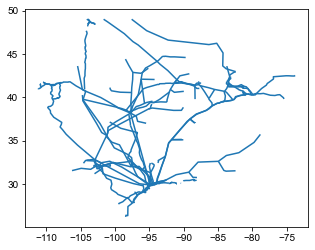

In [19]:
%matplotlib inline
pipes_01d.plot()

In [20]:
# Clip pipeline data to US boundary
pipes_02d = gpd.clip(pipes_03c, us_country)
pipes_02d = explode_multi_geoms(pipes_02d)

In [21]:
# Calculate pipeline length in km
pipes_01d = calculate_pipeline_length_km(pipes_01d)
pipes_02d = calculate_pipeline_length_km(pipes_02d)

Current CRS is:  epsg:4326
Reprojecting to Eckert IV
Reprojecting finished. New CRS is:  +proj=eck4 +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs +type=crs
CRS of original gdf is:  +proj=eck4 +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs +type=crs
CRS of new gdf is:  epsg:4326
Current CRS is:  epsg:4326
Reprojecting to Eckert IV
Reprojecting finished. New CRS is:  +proj=eck4 +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs +type=crs
CRS of original gdf is:  +proj=eck4 +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs +type=crs
CRS of new gdf is:  epsg:4326


Text(0.5, 1.0, 'Clipped, Onshore data')

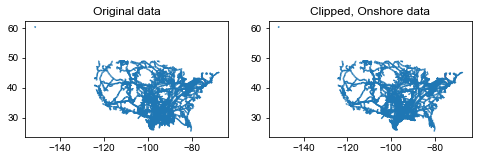

In [23]:
fig, (ax1, ax2) = plt.subplots(figsize=(8,6), nrows=1, ncols=2)
p1 = pipes_03c.plot(ax=ax1)
ax1.set_title('Original data')
p2 = pipes_02d.plot(ax=ax2)
ax2.set_title('Clipped, Onshore data')

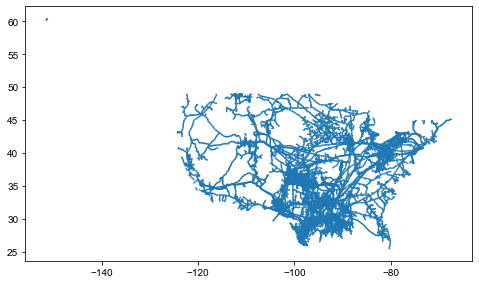

In [25]:
# Assign ON and OFFSHORE labels
pipes_02d['on_offshore'] = 'Onshore'

# The other pipeline dataset are therefore offshore
pipes_02e = pipes_03c[~pipes_03c.FID.isin(pipes_02d.FID)]
pipes_02e['on_offshore'] = 'Offshore'

# Concatenate
pipes_02f = pd.concat([pipes_02d, pipes_02e])

# View
fig, ax = plt.subplots(figsize=(8,5))
p2 = pipes_02f.plot(ax=ax)

In [26]:
# Add commodity field
pipes_01d['commodity'] = 'Hydrocarbon gas liquid'
pipes_02f['commodity'] = 'Natural gas'

In [27]:
# Create gdf
# ===============================================================================
_pipes_us, _pipes_us_list = integrate_pipelines(
    pipes_01d.reset_index(),
    starting_ids=stns_us7.OGIM_ID.iloc[-1]+1,
    category="Oil and natural gas pipelines",
    fac_alias="PIPELINES",
    country="United States",
    state_prov=None,
    src_ref_id="95",
    src_date="2022-01-12",
    on_offshore="Onshore",
    fac_name='Pipename',
    fac_id="GlobalID",
    fac_type=None,
    install_date=None,
    fac_status=None,
    op_name="Opername",
    commodity="commodity",
    liq_capacity_bpd=None,
    liq_throughput_bpd=None,
    gas_capacity_mmcfd=None,
    gas_throughput_mmcfd=None,
    pipe_diameter_mm=None,
    pipe_length_km="PIPELINE_LENGTH_KM",
    pipe_material=None
    )

100%|████████████████████████████████████████████████████████████████████████████████| 97/97 [00:00<00:00, 2020.86it/s]


,OGIM_ID,CATEGORY,COUNTRY,STATE_PROV,SRC_REF_ID,SRC_DATE,ON_OFFSHORE,FAC_NAME,FAC_ID,FAC_TYPE,...,INSTALL_DATE,COMMODITY,LIQ_CAPACITY_BPD,LIQ_THROUGHPUT_BPD,GAS_CAPACITY_MMCFD,GAS_THROUGHPUT_MMCFD,PIPE_DIAMETER_MM,PIPE_LENGTH_KM,PIPE_MATERIAL,geometry
0,3687788.0,OIL AND NATURAL GAS PIPELINES,UNITED STATES,N/A,95,2022-01-12,ONSHORE,MID-AMERICA PIPELINE COMPANY,9158C626-0BB1-44C6-8694-D0BC85EDC3B1,N/A,...,1900-01-01,HYDROCARBON GAS LIQUID,-999,-999,-999,-999,-999,1300.0,N/A,"LINESTRING (-109.27388 41.36037, -109.15788 41..."
1,3687789.0,OIL AND NATURAL GAS PIPELINES,UNITED STATES,N/A,95,2022-01-12,ONSHORE,SEMINOLE,4EC1B804-219B-41E9-AEA2-5445F7CCE3BF,N/A,...,1900-01-01,HYDROCARBON GAS LIQUID,-999,-999,-999,-999,-999,711.0,N/A,"LINESTRING (-102.90345 32.80142, -96.41927 30...."
2,3687790.0,OIL AND NATURAL GAS PIPELINES,UNITED STATES,N/A,95,2022-01-12,ONSHORE,SOUTH LEG,EC4C48A8-510B-43F9-9865-597DD22E2C44,N/A,...,1900-01-01,HYDROCARBON GAS LIQUID,-999,-999,-999,-999,-999,942.0,N/A,"LINESTRING (-102.90345 32.80142, -101.07599 35..."
3,3687791.0,OIL AND NATURAL GAS PIPELINES,UNITED STATES,N/A,95,2022-01-12,ONSHORE,CONWAY GATHERING,728C956A-B875-4C46-B3A6-269450582362,N/A,...,1900-01-01,HYDROCARBON GAS LIQUID,-999,-999,-999,-999,-999,238.0,N/A,"LINESTRING (-97.72963 38.18854, -96.89820 37.8..."
4,3687792.0,OIL AND NATURAL GAS PIPELINES,UNITED STATES,N/A,95,2022-01-12,ONSHORE,DIXIE,5B520893-3CFD-4149-82C9-F325A1B8395A,N/A,...,1900-01-01,HYDROCARBON GAS LIQUID,-999,-999,-999,-999,-999,1790.0,N/A,"LINESTRING (-94.88050 29.91022, -93.86581 30.0..."


In [28]:
# Create gdf
# ===============================================================================
_pipes_us2, _pipes_us_list2 = integrate_pipelines(
    pipes_02f.reset_index(),
    starting_ids=_pipes_us.OGIM_ID.iloc[-1]+1,
    category="Oil and natural gas pipelines",
    fac_alias="PIPELINES",
    country="United States",
    state_prov=None,
    src_ref_id="96",
    src_date="2021-12-14",
    on_offshore="on_offshore",
    fac_name=None,
    fac_id="FID",
    fac_type=None,
    install_date=None,
    fac_status=None,
    op_name="Operator",
    commodity="commodity",
    liq_capacity_bpd=None,
    liq_throughput_bpd=None,
    gas_capacity_mmcfd=None,
    gas_throughput_mmcfd=None,
    pipe_diameter_mm=None,
    pipe_length_km="PIPELINE_LENGTH_KM",
    pipe_material=None
    )

100%|██████████████████████████████████████████████████████████████████████████| 33951/33951 [00:17<00:00, 1904.61it/s]


,OGIM_ID,CATEGORY,COUNTRY,STATE_PROV,SRC_REF_ID,SRC_DATE,ON_OFFSHORE,FAC_NAME,FAC_ID,FAC_TYPE,...,INSTALL_DATE,COMMODITY,LIQ_CAPACITY_BPD,LIQ_THROUGHPUT_BPD,GAS_CAPACITY_MMCFD,GAS_THROUGHPUT_MMCFD,PIPE_DIAMETER_MM,PIPE_LENGTH_KM,PIPE_MATERIAL,geometry
0,3687885.0,OIL AND NATURAL GAS PIPELINES,UNITED STATES,N/A,96,2021-12-14,ONSHORE,N/A,1,N/A,...,1900-01-01,NATURAL GAS,-999,-999,-999,-999,-999,22.6,N/A,"LINESTRING (-95.98872 34.92657, -95.98821 34.9..."
1,3687886.0,OIL AND NATURAL GAS PIPELINES,UNITED STATES,N/A,96,2021-12-14,ONSHORE,N/A,2,N/A,...,1900-01-01,NATURAL GAS,-999,-999,-999,-999,-999,23.8,N/A,"LINESTRING (-95.84094 34.89895, -95.85076 34.9..."
2,3687887.0,OIL AND NATURAL GAS PIPELINES,UNITED STATES,N/A,96,2021-12-14,ONSHORE,N/A,3,N/A,...,1900-01-01,NATURAL GAS,-999,-999,-999,-999,-999,0.48,N/A,"LINESTRING (-95.87582 34.97882, -95.88134 34.9..."
3,3687888.0,OIL AND NATURAL GAS PIPELINES,UNITED STATES,N/A,96,2021-12-14,ONSHORE,N/A,4,N/A,...,1900-01-01,NATURAL GAS,-999,-999,-999,-999,-999,2.91,N/A,"LINESTRING (-96.08984 34.79397, -96.09056 34.8..."
4,3687889.0,OIL AND NATURAL GAS PIPELINES,UNITED STATES,N/A,96,2021-12-14,ONSHORE,N/A,5,N/A,...,1900-01-01,NATURAL GAS,-999,-999,-999,-999,-999,7.03,N/A,"LINESTRING (-96.11796 34.77734, -96.11343 34.7..."


In [29]:
# Concatenate the two datasets
pipes_us_all = pd.concat([_pipes_us, _pipes_us2])

<AxesSubplot:>

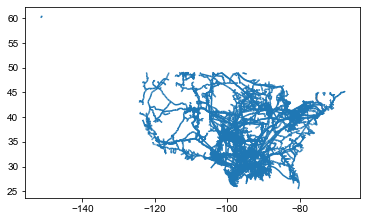

In [30]:
pipes_us_all.plot()

In [5]:
# # Save results
# # ===========================================================================
# save_spatial_data(
#     pipes_us_all, 
#     "united_states_oil_natural_gas_pipelines", 
#     schema_def=True, 
#     schema=schema_PIPELINES, 
#     file_type="GeoJSON", 
#     out_path="results\\"
#     )

In [7]:
pipes_us_all = read_spatial_data("results\\united_states_oil_natural_gas_pipelines_.geojson")

---------------------------------------
Total # of features in dataset = 34048
Index(['OGIM_ID', 'CATEGORY', 'COUNTRY', 'STATE_PROV', 'SRC_REF_ID',
       'SRC_DATE', 'ON_OFFSHORE', 'FAC_NAME', 'FAC_ID', 'FAC_TYPE',
       'FAC_STATUS', 'OPERATOR', 'INSTALL_DATE', 'COMMODITY',
       'LIQ_CAPACITY_BPD', 'LIQ_THROUGHPUT_BPD', 'GAS_CAPACITY_MMCFD',
       'GAS_THROUGHPUT_MMCFD', 'PIPE_DIAMETER_MM', 'PIPE_LENGTH_KM',
       'PIPE_MATERIAL', 'geometry'],
      dtype='object')


,OGIM_ID,CATEGORY,COUNTRY,STATE_PROV,SRC_REF_ID,SRC_DATE,ON_OFFSHORE,FAC_NAME,FAC_ID,FAC_TYPE,...,INSTALL_DATE,COMMODITY,LIQ_CAPACITY_BPD,LIQ_THROUGHPUT_BPD,GAS_CAPACITY_MMCFD,GAS_THROUGHPUT_MMCFD,PIPE_DIAMETER_MM,PIPE_LENGTH_KM,PIPE_MATERIAL,geometry
0,3687788,OIL AND NATURAL GAS PIPELINES,UNITED STATES,N/A,95,2022-01-12,ONSHORE,MID-AMERICA PIPELINE COMPANY,9158C626-0BB1-44C6-8694-D0BC85EDC3B1,N/A,...,1900-01-01,HYDROCARBON GAS LIQUID,-999.0,-999.0,-999.0,-999.0,-999.0,1300.0,N/A,"LINESTRING (-109.27388 41.36037, -109.15788 41..."
1,3687789,OIL AND NATURAL GAS PIPELINES,UNITED STATES,N/A,95,2022-01-12,ONSHORE,SEMINOLE,4EC1B804-219B-41E9-AEA2-5445F7CCE3BF,N/A,...,1900-01-01,HYDROCARBON GAS LIQUID,-999.0,-999.0,-999.0,-999.0,-999.0,711.0,N/A,"LINESTRING (-102.90345 32.80142, -96.41927 30...."
2,3687790,OIL AND NATURAL GAS PIPELINES,UNITED STATES,N/A,95,2022-01-12,ONSHORE,SOUTH LEG,EC4C48A8-510B-43F9-9865-597DD22E2C44,N/A,...,1900-01-01,HYDROCARBON GAS LIQUID,-999.0,-999.0,-999.0,-999.0,-999.0,942.0,N/A,"LINESTRING (-102.90345 32.80142, -101.07599 35..."
3,3687791,OIL AND NATURAL GAS PIPELINES,UNITED STATES,N/A,95,2022-01-12,ONSHORE,CONWAY GATHERING,728C956A-B875-4C46-B3A6-269450582362,N/A,...,1900-01-01,HYDROCARBON GAS LIQUID,-999.0,-999.0,-999.0,-999.0,-999.0,238.0,N/A,"LINESTRING (-97.72963 38.18854, -96.89820 37.8..."
4,3687792,OIL AND NATURAL GAS PIPELINES,UNITED STATES,N/A,95,2022-01-12,ONSHORE,DIXIE,5B520893-3CFD-4149-82C9-F325A1B8395A,N/A,...,1900-01-01,HYDROCARBON GAS LIQUID,-999.0,-999.0,-999.0,-999.0,-999.0,1790.0,N/A,"LINESTRING (-94.88050 29.91022, -93.86581 30.0..."


# Oil and gas basins <a name="Basins"></a>
 - Data comes from EIA

In [8]:
# BASIN dataset
basins_ = read_spatial_data("oil_gas_fields\\SedimentaryBasins_US_May2011_v2.shp") #EIA dataset

---------------------------------------
Total # of features in dataset = 32
Index(['NAME', 'Area_sq_km', 'Area_sq_mi', 'geometry'], dtype='object')


,NAME,Area_sq_km,Area_sq_mi,geometry
0,ANADARKO,42477.675069,16400.722036,"POLYGON ((-101.02878 36.06446, -100.92003 36.2..."
1,APPALACHIAN,415455.877946,160408.411275,"MULTIPOLYGON (((-84.97860 35.83618, -85.19261 ..."
2,ARDMORE,4120.137623,1590.794030,"POLYGON ((-97.96769 34.65231, -97.93570 34.639..."
3,ARKOMA,34563.559259,13345.064839,"POLYGON ((-96.45890 34.66442, -96.31879 34.723..."
4,BLACK WARRIOR,46702.060996,18031.766561,"POLYGON ((-90.39006 33.98192, -90.38079 34.076..."


In [9]:
# Transform CRS
basins2 = transform_CRS(basins_)

CRS of original gdf is:  epsg:4326
CRS of new gdf is:  epsg:4326


In [51]:
# ==============================================================================
# Create gdf
# ===============================================================================
us_basins_, us_basins_err = integrate_basins(
    basins2,
    starting_ids=pipes_us_all.OGIM_ID.iloc[-1]+1,
    category="Oil and natural gas basins",
    fac_alias= "OIL_GAS_BASINS",
    country="United States",
    state_prov=None,
    src_ref_id="98",
    src_date="2016-03-11",
    on_offshore="Onshore",
    _name="NAME",
    reservoir_type=None,
    op_name=None,
    _area_km2="Area_sq_km"
    )

100%|████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 2285.65it/s]


,OGIM_ID,CATEGORY,COUNTRY,STATE_PROV,SRC_REF_ID,SRC_DATE,ON_OFFSHORE,NAME,RESERVOIR_TYPE,OPERATOR,AREA_KM2,geometry
0,3721836.0,OIL AND NATURAL GAS BASINS,UNITED STATES,N/A,98,2016-03-11,ONSHORE,ANADARKO,N/A,N/A,42500.0,"POLYGON ((-101.02878 36.06446, -100.92003 36.2..."
1,3721837.0,OIL AND NATURAL GAS BASINS,UNITED STATES,N/A,98,2016-03-11,ONSHORE,APPALACHIAN,N/A,N/A,415000.0,"MULTIPOLYGON (((-84.97860 35.83618, -85.19261 ..."
2,3721838.0,OIL AND NATURAL GAS BASINS,UNITED STATES,N/A,98,2016-03-11,ONSHORE,ARDMORE,N/A,N/A,4120.0,"POLYGON ((-97.96769 34.65231, -97.93570 34.639..."
3,3721839.0,OIL AND NATURAL GAS BASINS,UNITED STATES,N/A,98,2016-03-11,ONSHORE,ARKOMA,N/A,N/A,34600.0,"POLYGON ((-96.45890 34.66442, -96.31879 34.723..."
4,3721840.0,OIL AND NATURAL GAS BASINS,UNITED STATES,N/A,98,2016-03-11,ONSHORE,BLACK WARRIOR,N/A,N/A,46700.0,"POLYGON ((-90.39006 33.98192, -90.38079 34.076..."


In [53]:
# Save results
# ===========================================================================
save_spatial_data(
    us_basins_, 
    "united_states_oil_natural_gas_basins", 
    schema_def=False, 
    schema=schema_BASINS, 
    file_type="GeoJSON", 
    out_path="results\\"
    )

===Successfully saved GeoJSON to specified path===


In [54]:
# TIGHT OIL AND GAS SHALE PLAYS
plays_ = read_spatial_data("oil_gas_fields\\ShalePlays_US_EIA_Dec2021.shp")

---------------------------------------
Total # of features in dataset = 50
Index(['Basin', 'Lithology', 'Shale_play', 'References', 'Source',
       'Area_sq_mi', 'Area_sq_km', 'ID', 'Age_shale', 'Age_color',
       'Shape_Leng', 'Shape_Area', 'geometry'],
      dtype='object')


,Basin,Lithology,Shale_play,References,Source,Area_sq_mi,Area_sq_km,ID,Age_shale,Age_color,Shape_Leng,Shape_Area,geometry
0,Valley and Ridge,Shale,Conasauga,Shale gas development area- Pashin 2008 fig 1,EIA,2223.551552,5758.972081,CON001,Cambrian,1,6.956718,0.561696,"POLYGON ((-87.37002 33.01457, -87.38709 33.017..."
1,Black Warrior,Shale,Chattanooga,Shale gas development area- Pashin 2008 fig 1,EIA,695.668275,1801.772561,CHA002,Devonian,4,1.590782,0.175812,"POLYGON ((-86.64281 33.81607, -86.65574 33.811..."
2,Black Warrior,Shale,Floyd-Chattanooga,Floyd activity outline-Bowker 2008 slide 10,EIA,1466.582399,3798.430975,FLO001,Miss-Devonian,5,3.802870,0.365521,"POLYGON ((-88.62562 32.52086, -88.64079 32.524..."
3,Black Warrior,Shale,Floyd-Neal,Floyd activity outline-Bowker 2008 slide 10,EIA,5191.296394,13445.395936,FLO002,Mississippian,5,6.299989,1.305480,"POLYGON ((-88.22560 33.81165, -88.20650 33.805..."
4,Ardmore,Shale,Woodford,Cardott 2008 slide 30 and wells from OK Geol Surv,EIA,1200.315850,3108.803781,WOO002,Devonian,4,3.141750,0.304188,"POLYGON ((-96.45931 34.05161, -96.45759 33.970..."


In [55]:
# Transform CRS
plays3_ = transform_CRS(plays_)

CRS of original gdf is:  epsg:4326
CRS of new gdf is:  epsg:4326


In [56]:
# ==============================================================================
# Create gdf
# ===============================================================================
us_plays_, us_plays_err = integrate_basins(
    plays3_,
    starting_ids=us_basins_.OGIM_ID.iloc[-1]+1,
    category="Oil and natural gas fields",
    fac_alias= "OIL_GAS_BASINS",
    country="United States",
    state_prov=None,
    src_ref_id="99",
    src_date="2019-10-08",
    on_offshore="Onshore",
    _name="Shale_play",
    reservoir_type="Lithology",
    op_name=None,
    _area_km2="Area_sq_km"
    )

100%|████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2272.35it/s]


,OGIM_ID,CATEGORY,COUNTRY,STATE_PROV,SRC_REF_ID,SRC_DATE,ON_OFFSHORE,NAME,RESERVOIR_TYPE,OPERATOR,AREA_KM2,geometry
0,3721868.0,OIL AND NATURAL GAS FIELDS,UNITED STATES,N/A,99,2019-10-08,ONSHORE,CONASAUGA,SHALE,N/A,5760.0,"POLYGON ((-87.37002 33.01457, -87.38709 33.017..."
1,3721869.0,OIL AND NATURAL GAS FIELDS,UNITED STATES,N/A,99,2019-10-08,ONSHORE,CHATTANOOGA,SHALE,N/A,1800.0,"POLYGON ((-86.64281 33.81607, -86.65574 33.811..."
2,3721870.0,OIL AND NATURAL GAS FIELDS,UNITED STATES,N/A,99,2019-10-08,ONSHORE,FLOYD-CHATTANOOGA,SHALE,N/A,3800.0,"POLYGON ((-88.62562 32.52086, -88.64079 32.524..."
3,3721871.0,OIL AND NATURAL GAS FIELDS,UNITED STATES,N/A,99,2019-10-08,ONSHORE,FLOYD-NEAL,SHALE,N/A,13400.0,"POLYGON ((-88.22560 33.81165, -88.20650 33.805..."
4,3721872.0,OIL AND NATURAL GAS FIELDS,UNITED STATES,N/A,99,2019-10-08,ONSHORE,WOODFORD,SHALE,N/A,3110.0,"POLYGON ((-96.45931 34.05161, -96.45759 33.970..."


In [57]:
# Save results
# ===========================================================================
save_spatial_data(
    us_plays_, 
    "united_states_oil_natural_gas_fields", 
    schema_def=False, 
    schema=schema_BASINS, 
    file_type="GeoJSON", 
    out_path="results\\"
    )

===Successfully saved GeoJSON to specified path===


# Underground storage <a name="Underground_Storage"></a>
 - Data comes from EIA

In [58]:
stor_ = read_spatial_data("natural_gas_underground_storage\\Natural_Gas_Underground_Storage.geojson")

---------------------------------------
Total # of features in dataset = 412
Index(['FID', 'State', 'ID', 'fld_code', 'res_code', 'Field', 'Reservoir',
       'Field_Type', 'Company', 'County', 'Region', 'Status', 'base_gas',
       'work_cap', 'fld_cap', 'maxdeliv', 'Source', 'Period', 'Longitude',
       'Latitude', 'geometry'],
      dtype='object')


,FID,State,ID,fld_code,res_code,Field,Reservoir,Field_Type,Company,County,...,Status,base_gas,work_cap,fld_cap,maxdeliv,Source,Period,Longitude,Latitude,geometry
0,1,AK,117499_133,117499,133,CANNERY LOOP,STERLING C,Depleted Field,COOK INLET NATURAL GAS STORAGE,Kenai Peninsula,...,Active,6961981,10940258,17902240,149190,EIA-191 survey,202012,-151.2202,60.5524,POINT (-151.22020 60.55240)
1,2,AK,374014_133,374014,133,KENAI,STERLING POOL 6,Depleted Field,HILCORP ALASKA LLC,Kenai Peninsula,...,Active,5967413,51717583,57684997,60000,EIA-191 survey,202012,-151.2737,60.4753,POINT (-151.27370 60.47530)
2,3,AK,571967_283,571967,283,PRETTY CREEK UNIT,BELUGA 51-5,Depleted Field,HILCORP ALASKA LLC,Kenai Peninsula,...,Active,447556,2297454,2745010,10940,EIA-191 survey,202012,-150.8969,61.2630,POINT (-150.89690 61.26300)
3,4,AK,691992_1,691992,1,SWANSON RIVER,TYONEK 64-5,Depleted Field,HILCORP ALASKA LLC,Kenai Peninsula,...,Active,220000,1260000,1860000,24300,EIA-191 survey,202012,-150.8603,60.7298,POINT (-150.86030 60.72980)
4,5,AK,691992_2,691992,2,SWANSON RIVER,TYONEK 77-3,Depleted Field,HILCORP ALASKA LLC,Kenai Peninsula,...,Active,600000,1700000,3400000,32400,EIA-191 survey,202012,-150.8474,60.7855,POINT (-150.84740 60.78550)


In [62]:
# Transform CRS
stor2 = transform_CRS(stor_, appendLatLon=True)

CRS of original gdf is:  epsg:4326
CRS of new gdf is:  epsg:4326


In [63]:
# Fix state names
# ===========================================================================
stor2 = replace_row_names(stor2, "State", dict_names=dict_us_states)

Original list of unique attributes =  ['AK' 'AL' 'AR' 'CA' 'CO' 'IA' 'IL' 'IN' 'KS' 'KY' 'LA' 'MD' 'MI' 'MN'
 'MO' 'MS' 'MT' 'NE' 'NM' 'NY' 'OH' 'OK' 'OR' 'PA' 'TN' 'TX' 'UT' 'VA'
 'WA' 'WV' 'WY']
['ALASKA' 'ALABAMA' 'ARKANSAS' 'CALIFORNIA' 'COLORADO' 'IOWA' 'ILLINOIS'
 'INDIANA' 'KANSAS' 'KENTUCKY' 'LOUISIANA' 'MARYLAND' 'MICHIGAN'
 'MINNESOTA' 'MISSOURI' 'MISSISSIPPI' 'MONTANA' 'NEBRASKA' 'NEW MEXICO'
 'NEW YORK' 'OHIO' 'OKLAHOMA' 'OREGON' 'PENNSYLVANIA' 'TENNESSEE' 'TEXAS'
 'UTAH' 'VIRGINIA' ' WASHINGTON' 'WEST VIRGINIA' 'WYOMING']


In [64]:
stor2.Status.unique()

array(['Active', 'Inactive'], dtype=object)

In [66]:
# Create gdf
# ===============================================================================u
us_stor, errors = integrate_facs(
    stor2,
    fac_alias="LNG_STORAGE",
    starting_ids=us_plays_.OGIM_ID.iloc[-1]+1,
    category="Injection and disposal",
    country="United States",
    state_prov="State",
    src_ref_id="100",
    src_date="2022-02-05",
    on_offshore="Onshore",
    fac_name="Field",
    op_name="Company",
    fac_type='Field_Type',
    fac_status='Status',
    fac_id='ID',
    liq_capacity_bpd=None,
    fac_latitude="latitude_calc",
    fac_longitude="longitude_calc"
    )

100%|██████████████████████████████████████████████████████████████████████████████| 412/412 [00:00<00:00, 1791.29it/s]


,OGIM_ID,CATEGORY,COUNTRY,STATE_PROV,SRC_REF_ID,SRC_DATE,ON_OFFSHORE,FAC_NAME,FAC_ID,FAC_TYPE,...,INSTALL_DATE,COMMODITY,LIQ_CAPACITY_BPD,LIQ_THROUGHPUT_BPD,GAS_CAPACITY_MMCFD,GAS_THROUGHPUT_MMCFD,NUM_STORAGE_TANKS,LATITUDE,LONGITUDE,geometry
0,3721918.0,INJECTION AND DISPOSAL,UNITED STATES,ALASKA,100,2022-02-05,ONSHORE,CANNERY LOOP,117499_133,DEPLETED FIELD,...,1900-01-01,N/A,-999,-999,-999,-999,-999,60.5524,-151.2202,POINT (-151.22020 60.55240)
1,3721919.0,INJECTION AND DISPOSAL,UNITED STATES,ALASKA,100,2022-02-05,ONSHORE,KENAI,374014_133,DEPLETED FIELD,...,1900-01-01,N/A,-999,-999,-999,-999,-999,60.4753,-151.2737,POINT (-151.27370 60.47530)
2,3721920.0,INJECTION AND DISPOSAL,UNITED STATES,ALASKA,100,2022-02-05,ONSHORE,PRETTY CREEK UNIT,571967_283,DEPLETED FIELD,...,1900-01-01,N/A,-999,-999,-999,-999,-999,61.263,-150.8969,POINT (-150.89690 61.26300)
3,3721921.0,INJECTION AND DISPOSAL,UNITED STATES,ALASKA,100,2022-02-05,ONSHORE,SWANSON RIVER,691992_1,DEPLETED FIELD,...,1900-01-01,N/A,-999,-999,-999,-999,-999,60.7298,-150.8603,POINT (-150.86030 60.72980)
4,3721922.0,INJECTION AND DISPOSAL,UNITED STATES,ALASKA,100,2022-02-05,ONSHORE,SWANSON RIVER,691992_2,DEPLETED FIELD,...,1900-01-01,N/A,-999,-999,-999,-999,-999,60.7855,-150.8474,POINT (-150.84740 60.78550)


In [67]:
# Save results
# ===========================================================================
save_spatial_data(
    us_stor, 
    "united_states_injection_disposal", 
    schema_def=False, 
    schema=schema_LNG_STORAGE, 
    file_type="GeoJSON", 
    out_path="results\\"
    )

===Successfully saved GeoJSON to specified path===
